clean the data 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Develop predictive models that can identify student risk factors for dropout and take early interventions to improve student retention rate.

## dropout

In [3]:
df = pd.read_csv("dataset.csv")  

# Criar os dois datasets
df_enrolled = df[df["Target"] == "Enrolled"]
df_new = df[df["Target"] != "Enrolled"]

# Salvar se necessário
df_enrolled.to_csv("students_enrolled.csv", index=False)
df_new.to_csv("students_not_enrolled.csv", index=False)
df_new_graduate = df_new.copy()

we can see that the data doesn't have null values

In [4]:
print(df.isnull().sum()[df.isnull().sum() > 0]) 

Series([], dtype: int64)


the data doesn't have duplicates too 

In [5]:
# Contar duplicatas
print("Duplicatas:", df.duplicated().sum())


Duplicatas: 0


In [6]:
# Criar uma variável binária (1 = Dropout, 0 = Não Dropout)
df_new["Dropout"] = df_new["Target"].apply(lambda x: 1 if x == "Dropout" else 0)

df_new.drop(columns=["Target"], inplace=True)
df_new

/var/folders/mg/trj2dw9n74q5lcbvnrpm0lkw0000gn/T/ipykernel_62266/2049618524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Dropout"] = df_new["Target"].apply(lambda x: 1 if x == "Dropout" else 0)
/var/folders/mg/trj2dw9n74q5lcbvnrpm0lkw0000gn/T/ipykernel_62266/2049618524.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(columns=["Target"], inplace=True)


Marital status  Application mode  Application order  Course  \
0                  1                 8                  5       2   
1                  1                 6                  1      11   
2                  1                 1                  5       5   
3                  1                 8                  2      15   
4                  2                12                  1       3   
...              ...               ...                ...     ...   
4419               1                 1                  6      15   
4420               1                 1                  2      15   
4421               1                 1                  1      12   
4422               1                 1                  1       9   
4423               1                 5                  1      15   

      Daytime/evening attendance  Previous qualification  Nacionality  \
0                              1                       1            1   
1                              1                       1            1   
2                              1                       1            1   
3                              1                       1            1   
4                              0                       1            1   
...                          ...                     ...          ...   
4419                           1                       1            1   
4420                           1                       1           19   
4421                           1                       1            1   
4422                           1                       1            1   
4423                           1                       1            9   

      Mother's qualification  Father's qualification  Mother's occupation  \
0                         13                      10                    6   
1                          1                       3                    4   
2                         22                      27                   10   
3                         23                      27                    6   
4                         22                      28                   10   
...                      ...                     ...                  ...   
4419                       1                       1                    6   
4420                       1                       1                   10   
4421                      22                      27                   10   
4422                      22                      27                    8   
4423                      23                      27                    6   

      ...  Curricular units 2nd sem (credited)  \
0     ...                                    0   
1     ...                                    0   
2     ...                                    0   
3     ...                                    0   
4     ...                                    0   
...   ...                                  ...   
4419  ...                                    0   
4420  ...                                    0   
4421  ...                                    0   
4422  ...                                    0   
4423  ...                                    0   

      Curricular units 2nd sem (enrolled)  \
0                                       0   
1                                       6   
2                                       6   
3                                       6   
4                                       6   
...                                   ...   
4419                                    6   
4420                                    6   
4421                                    8   
4422                                    5   
4423                                    6   

      Curricular units 2nd sem (evaluations)  \
0                                          0   
1                                          6   
2                                          0   
3                                        

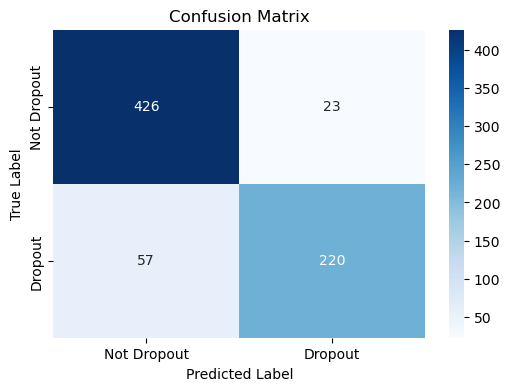

Accuracy: 0.8898071625344353
Classification Report:
               precision    recall  f1-score   support

 Not Dropout       0.88      0.95      0.91       449
     Dropout       0.91      0.79      0.85       277

    accuracy                           0.89       726
   macro avg       0.89      0.87      0.88       726
weighted avg       0.89      0.89      0.89       726



In [7]:
df_new = pd.get_dummies(df_new, drop_first=True)

X = df_new.drop(columns=["Dropout"])  
y = df_new["Dropout"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree = DecisionTreeClassifier(max_depth=5, random_state=42)  # max_depth evita overfitting

# Treinar o modelo
tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Dropout", "Dropout"], yticklabels=["Not Dropout", "Dropout"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Exibir métricas de desempenho
print("Accuracy:", accuracy_score(y_test, y_pred))

# Exibir relatório de classificação (Precision, Recall, F1-Score)
report = classification_report(y_test, y_pred, target_names=["Not Dropout", "Dropout"])
print("Classification Report:\n", report)



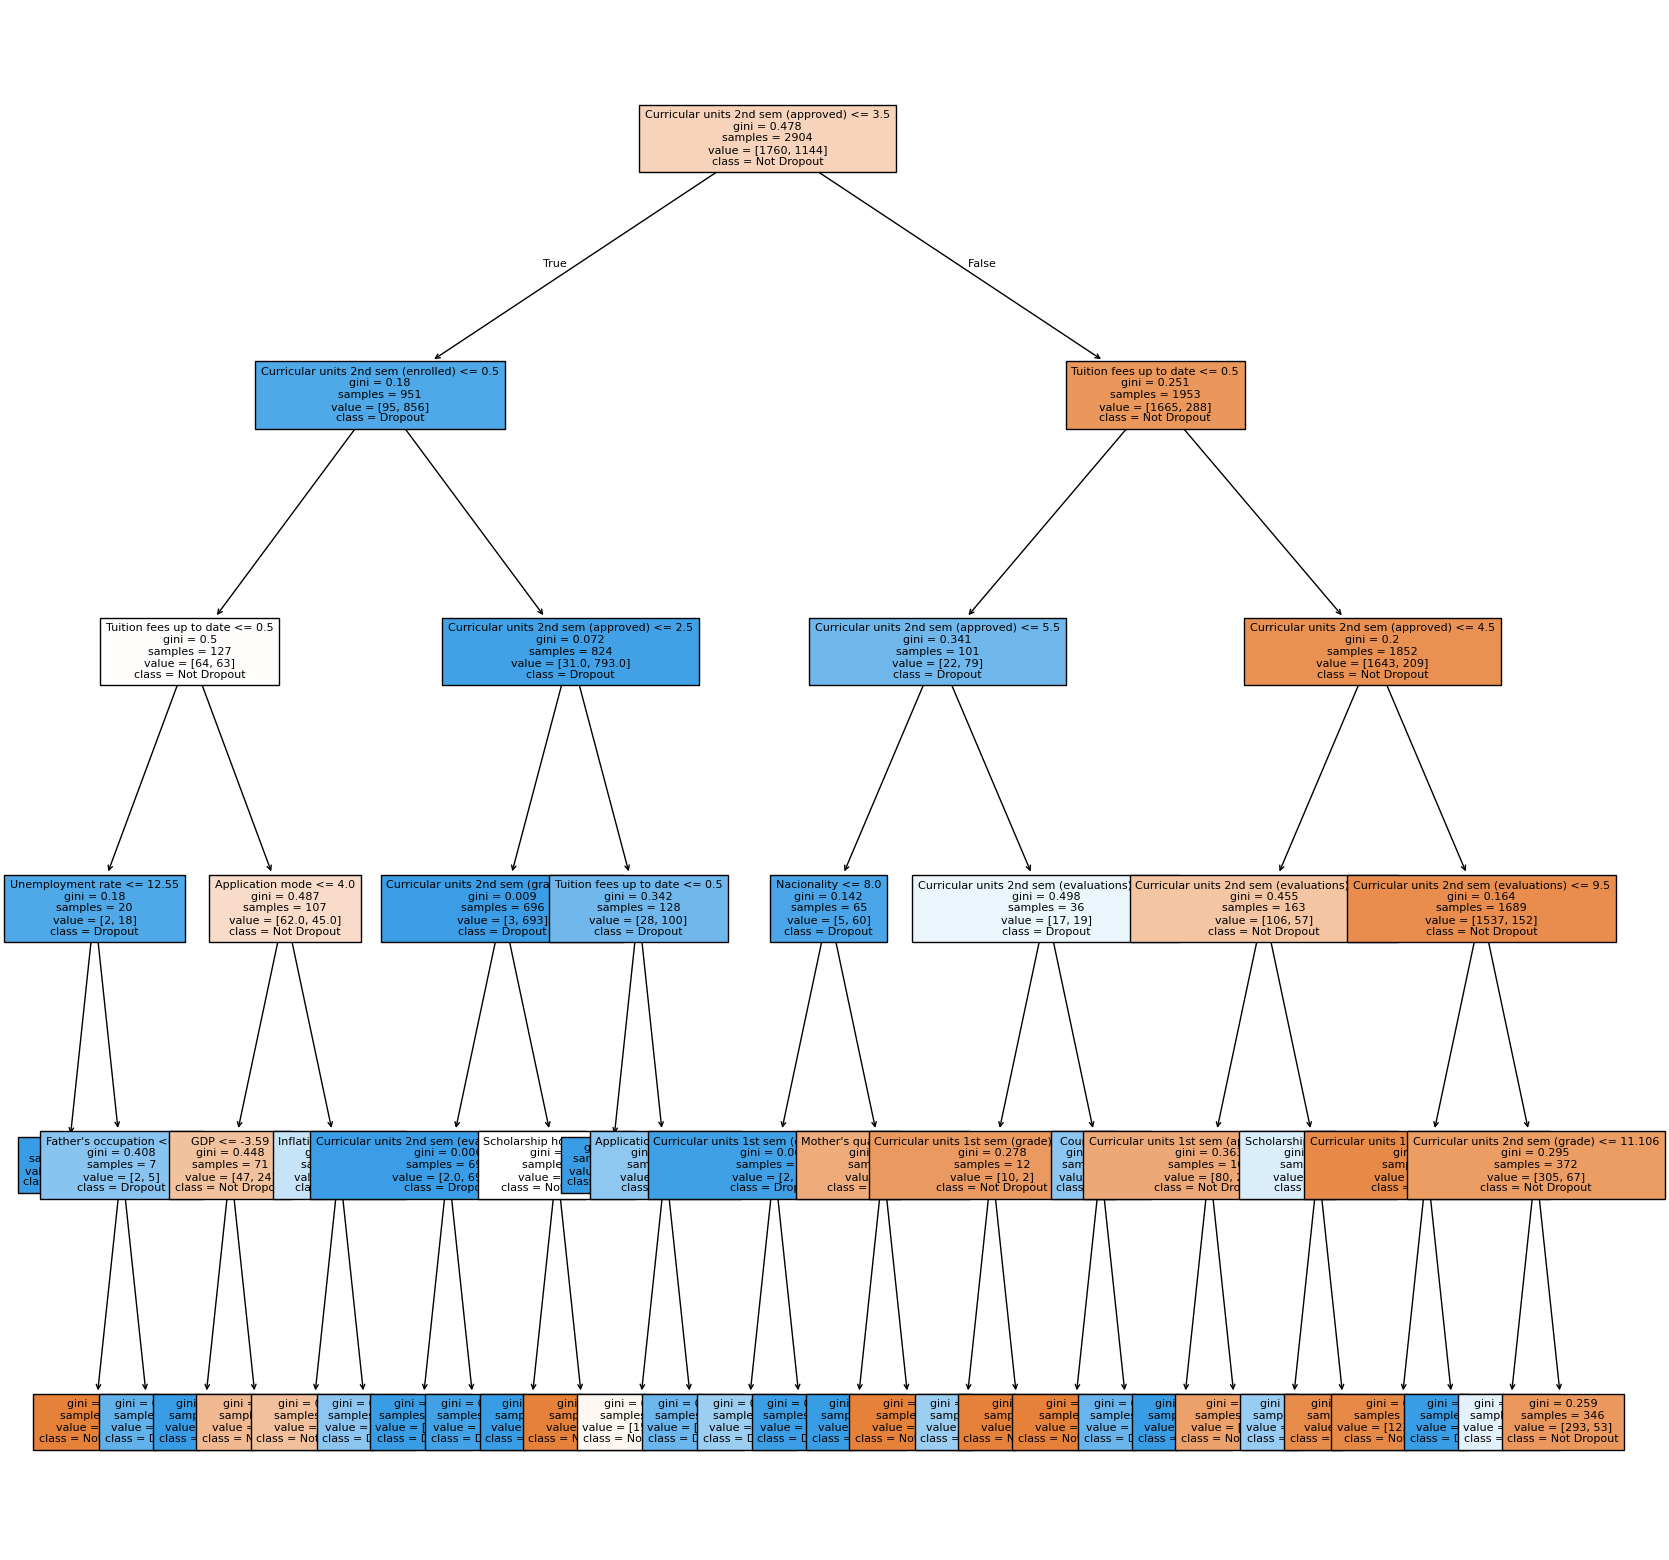

In [8]:
plt.figure(figsize=(20, 20))
plot_tree(tree, feature_names=X.columns, class_names=["Not Dropout", "Dropout"], filled=True, fontsize=8)
plt.show()

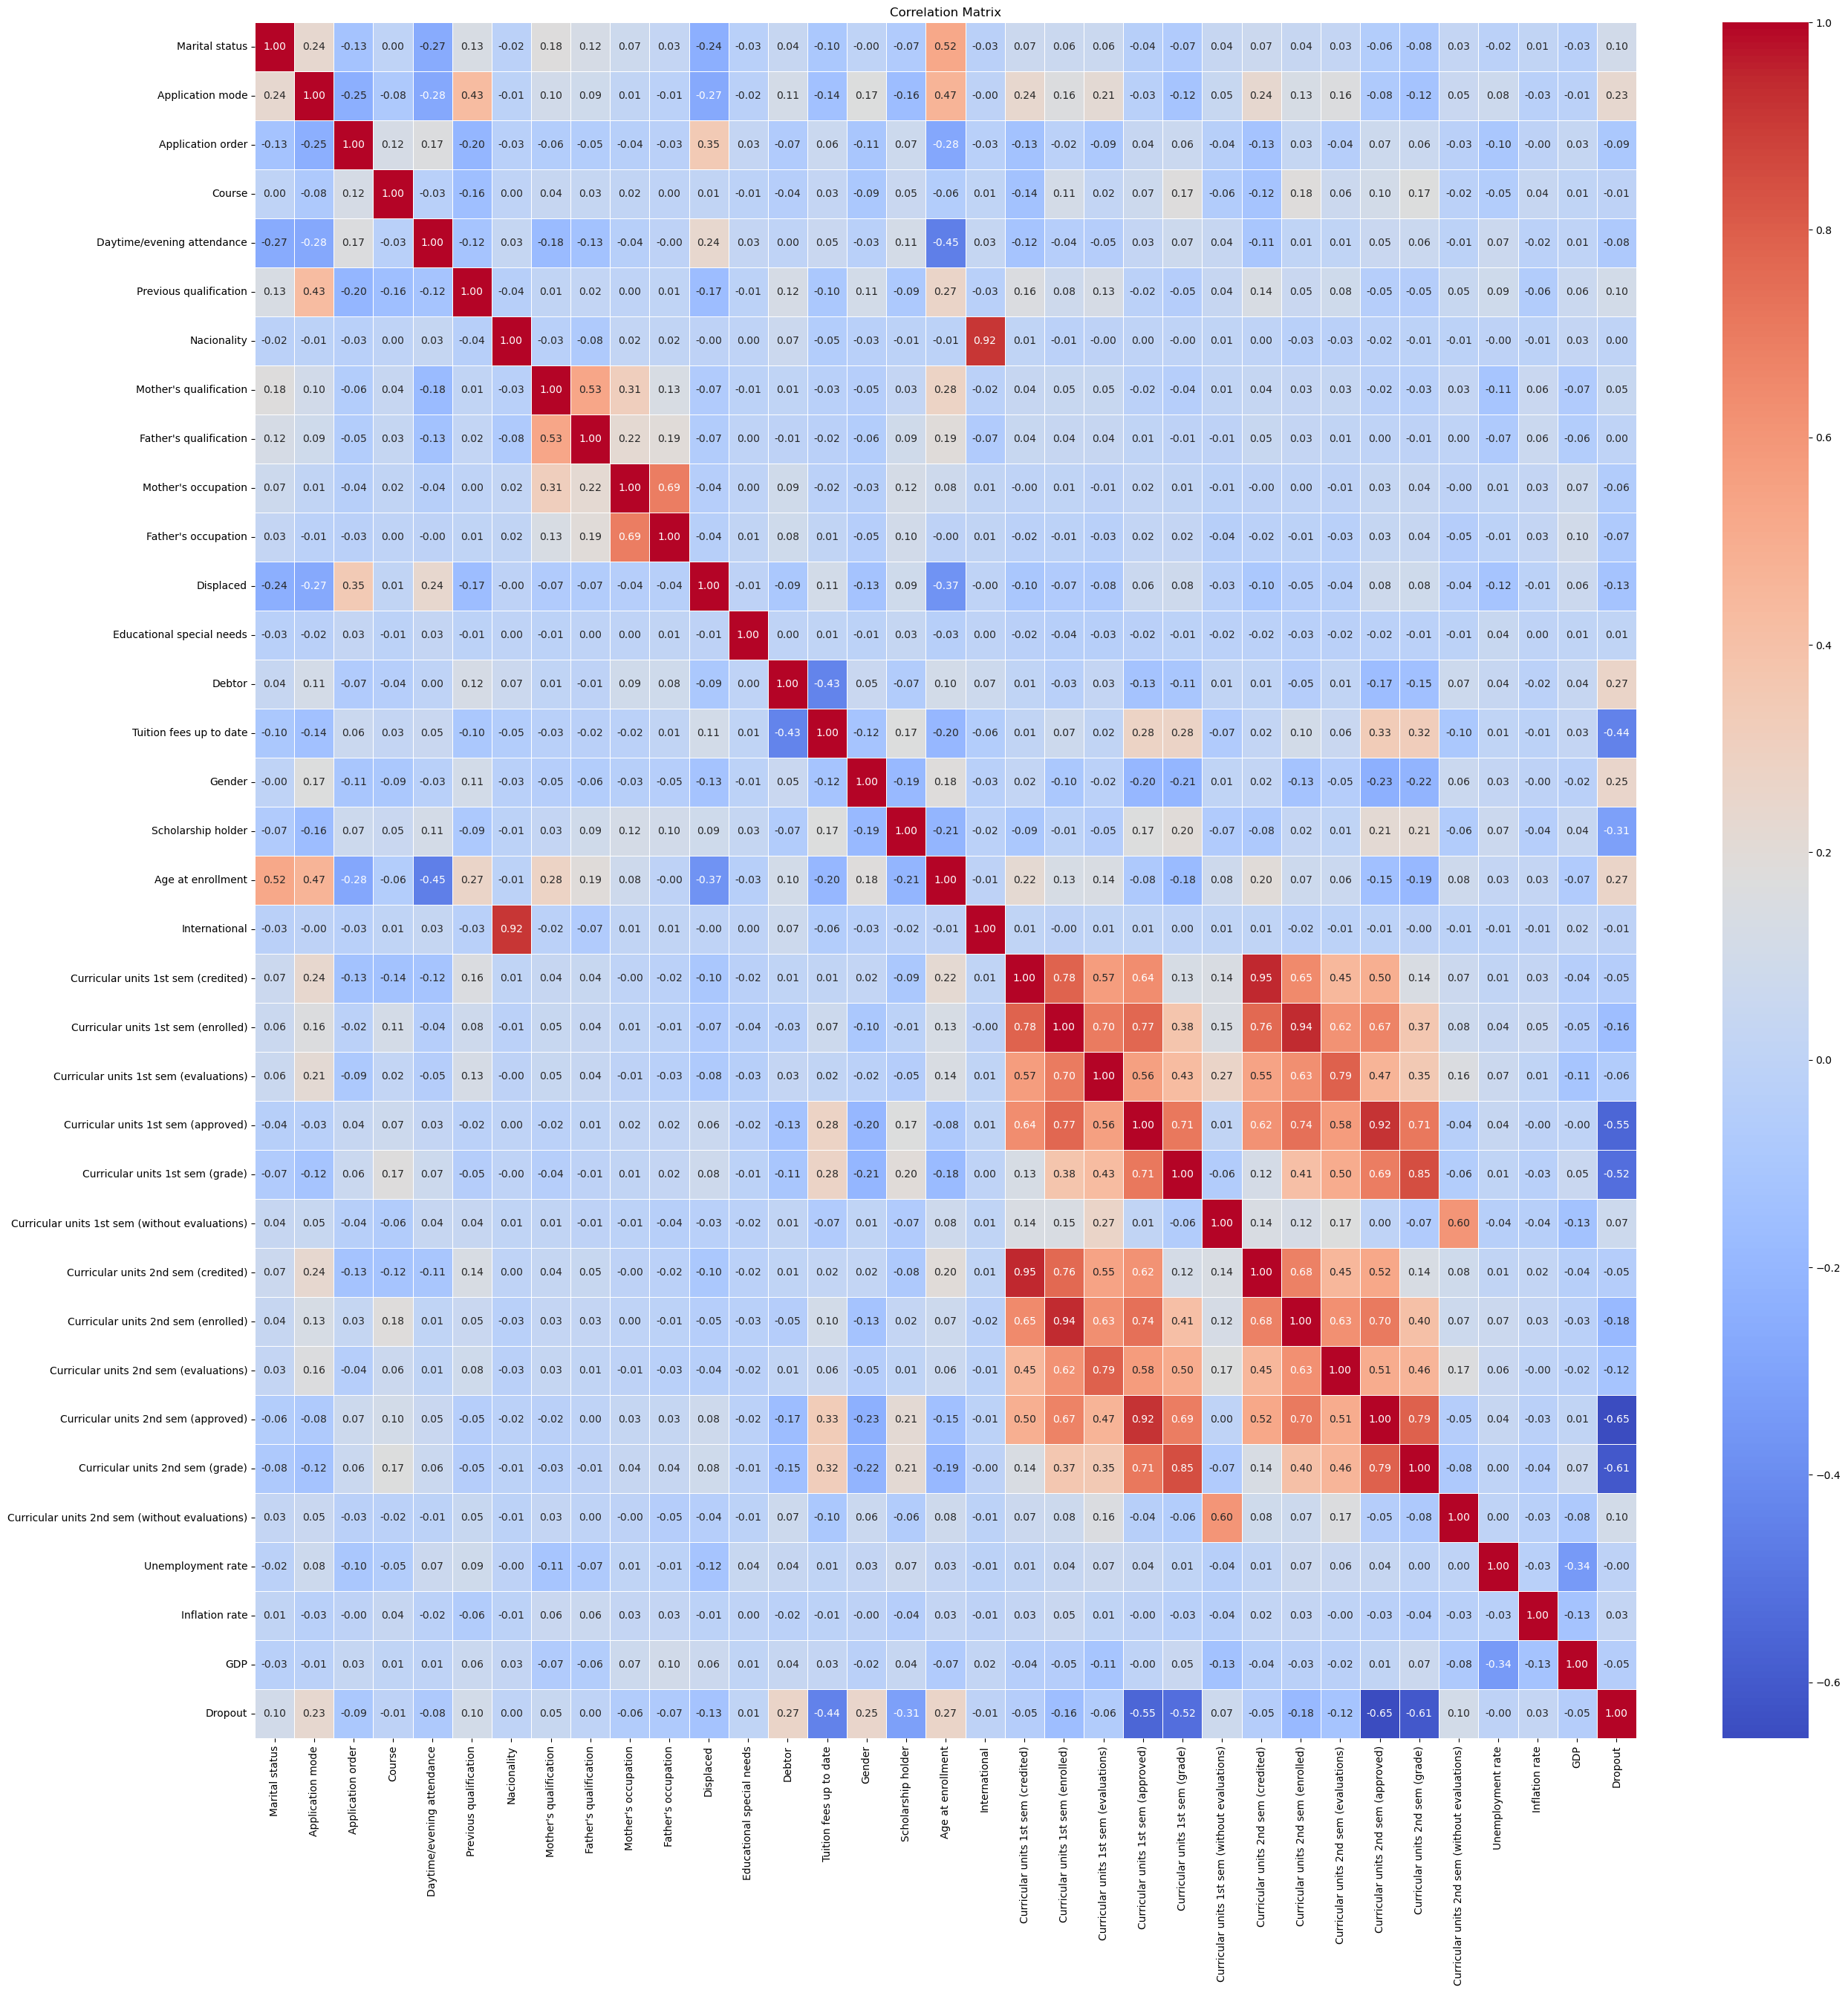

In [9]:
corr_matrix = df_new.corr()

# Plotar a matriz de correlação
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

we can observe from the correlation matrix that the variables that havr the strogest correlation with the dropouts are 'Curricular units 2end sem (grade)' , ' Curricular units 2end sem (approved)' , 'Curricular units 2end sem (grade)', 'Curricular units 2end sem (approved)', 'scholarship holder', 'tuiton fets up to date ', 
the variables that have a relation but not that strong are ' agr and envirement' , 'gender' , 'debtor', 'application mode' 
now we are going to do a decision tree with the strogger datas and another with all the data above 

In [10]:
# Features with the strongest correlation
strong_features = [
    "Curricular units 2nd sem (grade)", 
    "Curricular units 2nd sem (approved)", 
    "Scholarship holder", 
    "Tuition fees up to date",
    "Curricular units 1st sem (grade)", 
    "Curricular units 1st sem (approved)", 
]

# Features with moderate correlation
moderate_features = [
    "Age at enrollment", 
    "Gender", 
    "Debtor", 
    "Application mode"
]

# Creating two feature sets
X_strong = df_new[strong_features]  # Only strong correlation features
X_all = df_new[strong_features + moderate_features]  # Strong + moderate correlation features
y = df_new["Dropout"]  # Target variable


In [11]:
# Splitting data for both models
X_train_strong, X_test_strong, y_train_strong, y_test_strong = train_test_split(X_strong, y, test_size=0.2, random_state=42)
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y, test_size=0.2, random_state=42)


In [12]:
tree_strong = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_all = DecisionTreeClassifier(max_depth=5, random_state=42)

tree_strong.fit(X_train_strong, y_train_strong)
tree_all.fit(X_train_all, y_train_all)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [13]:
# Predictions
y_pred_strong = tree_strong.predict(X_test_strong)
y_pred_all = tree_all.predict(X_test_all)

In [14]:
# Metrics for the model with strong correlation features
print("Decision Tree with Strong Features:")
print("Accuracy:", accuracy_score(y_test_strong, y_pred_strong))
print("Confusion Matrix:\n", confusion_matrix(y_test_strong, y_pred_strong))
print("Classification Report:\n", classification_report(y_test_strong, y_pred_strong))

Decision Tree with Strong Features:
Accuracy: 0.8911845730027548
Confusion Matrix:
 [[433  16]
 [ 63 214]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.92       449
           1       0.93      0.77      0.84       277

    accuracy                           0.89       726
   macro avg       0.90      0.87      0.88       726
weighted avg       0.89      0.89      0.89       726



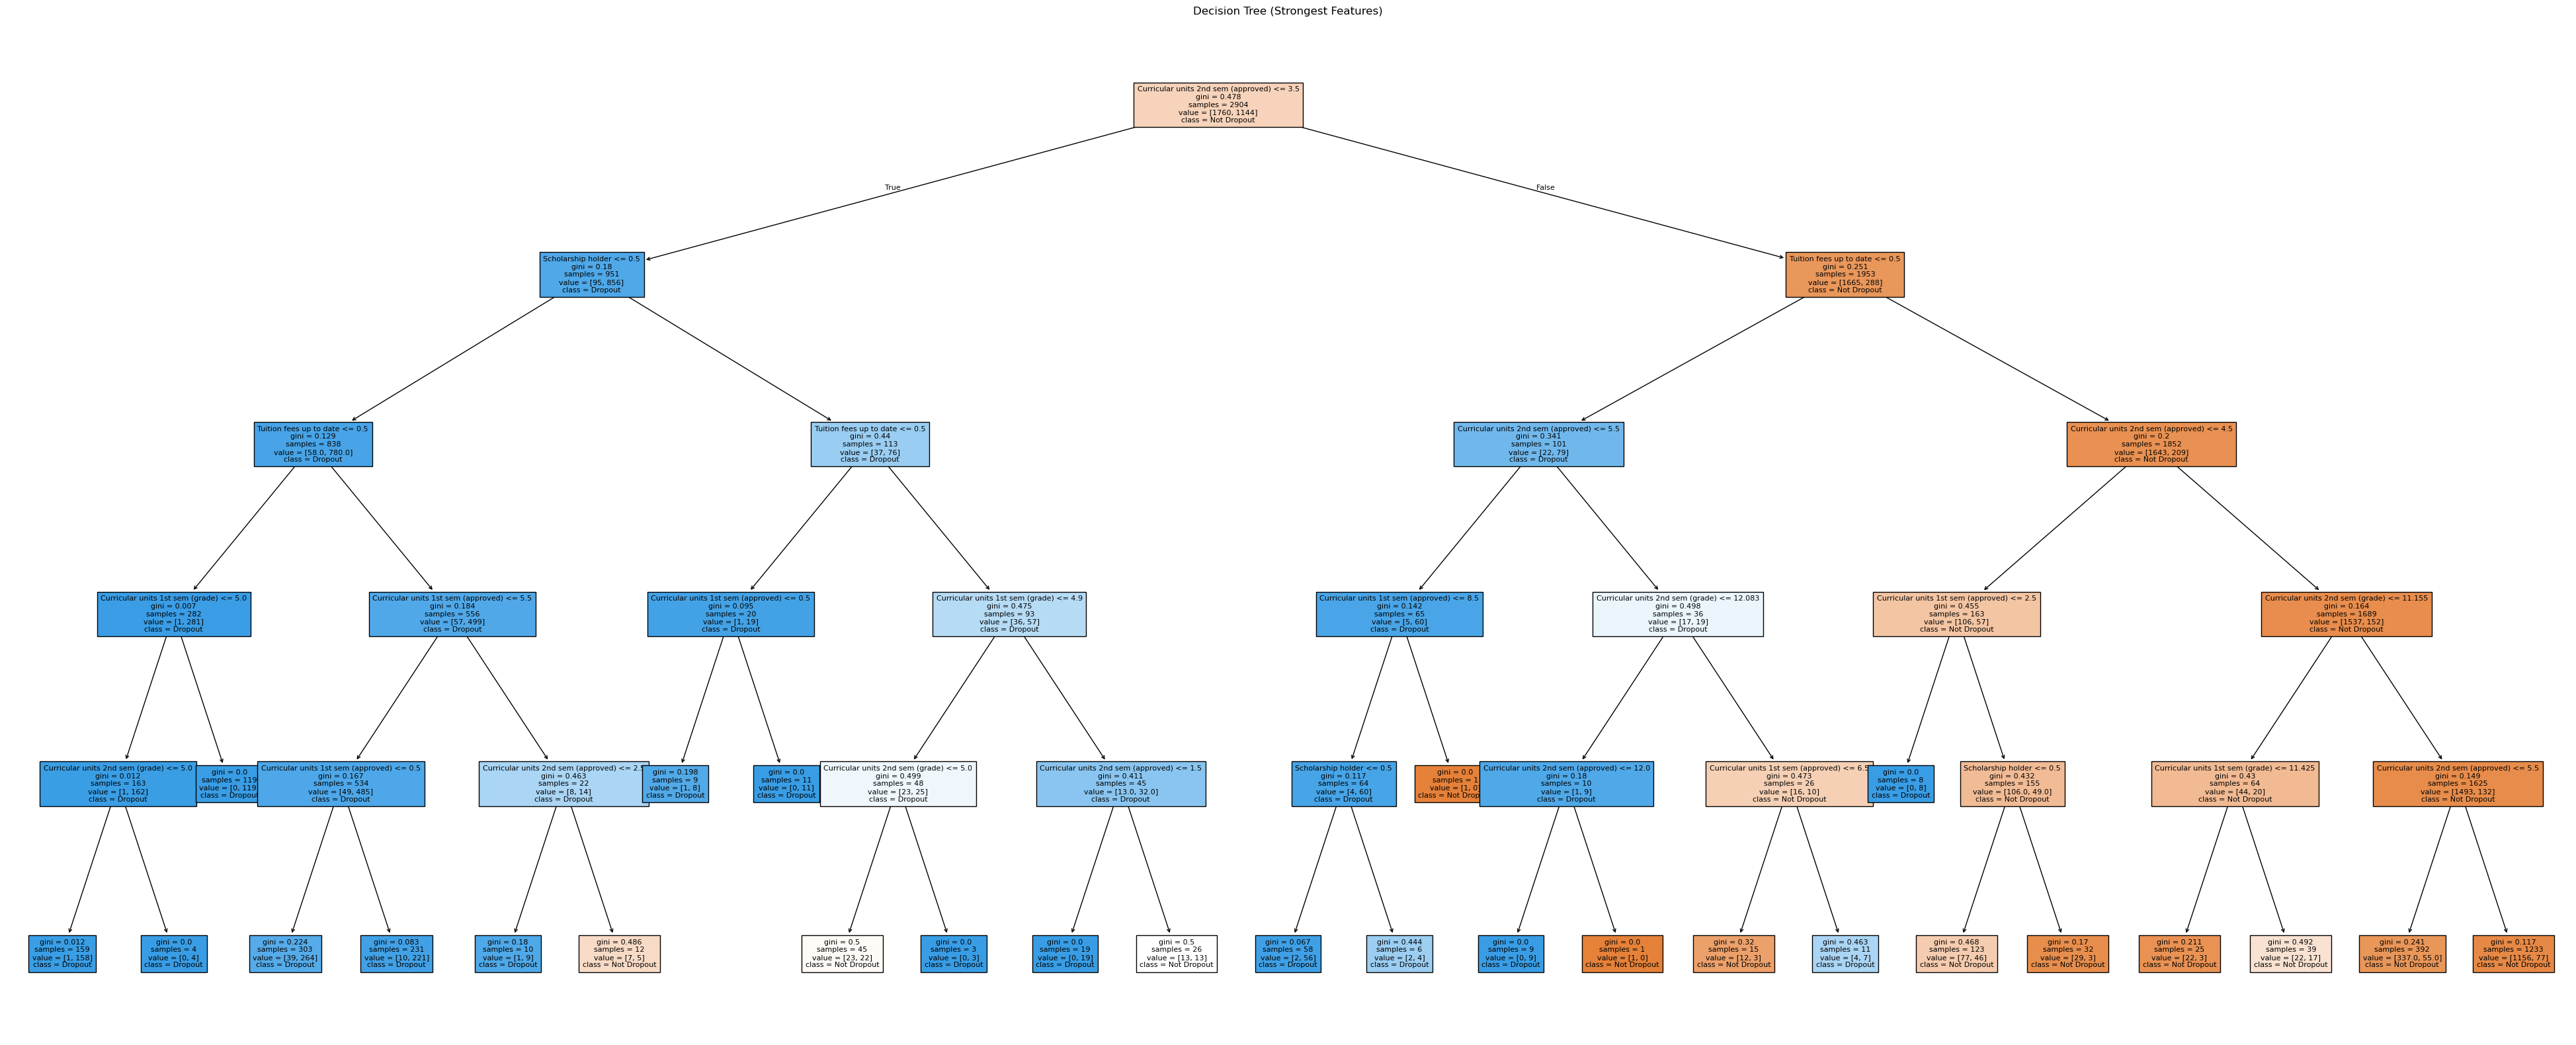

In [15]:
# Plot Decision Tree with strong features
plt.figure(figsize=(50, 20))
plot_tree(tree_strong, feature_names=X_strong.columns, class_names=["Not Dropout", "Dropout"], filled=True, fontsize=8)
plt.title("Decision Tree (Strongest Features)")
plt.show()

In [16]:
# Metrics for the model with all relevant features
print("\nDecision Tree with All Correlated Features:")
print("Accuracy:", accuracy_score(y_test_all, y_pred_all))
print("Confusion Matrix:\n", confusion_matrix(y_test_all, y_pred_all))
print("Classification Report:\n", classification_report(y_test_all, y_pred_all))


Decision Tree with All Correlated Features:
Accuracy: 0.8870523415977961
Confusion Matrix:
 [[432  17]
 [ 65 212]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       449
           1       0.93      0.77      0.84       277

    accuracy                           0.89       726
   macro avg       0.90      0.86      0.88       726
weighted avg       0.89      0.89      0.88       726



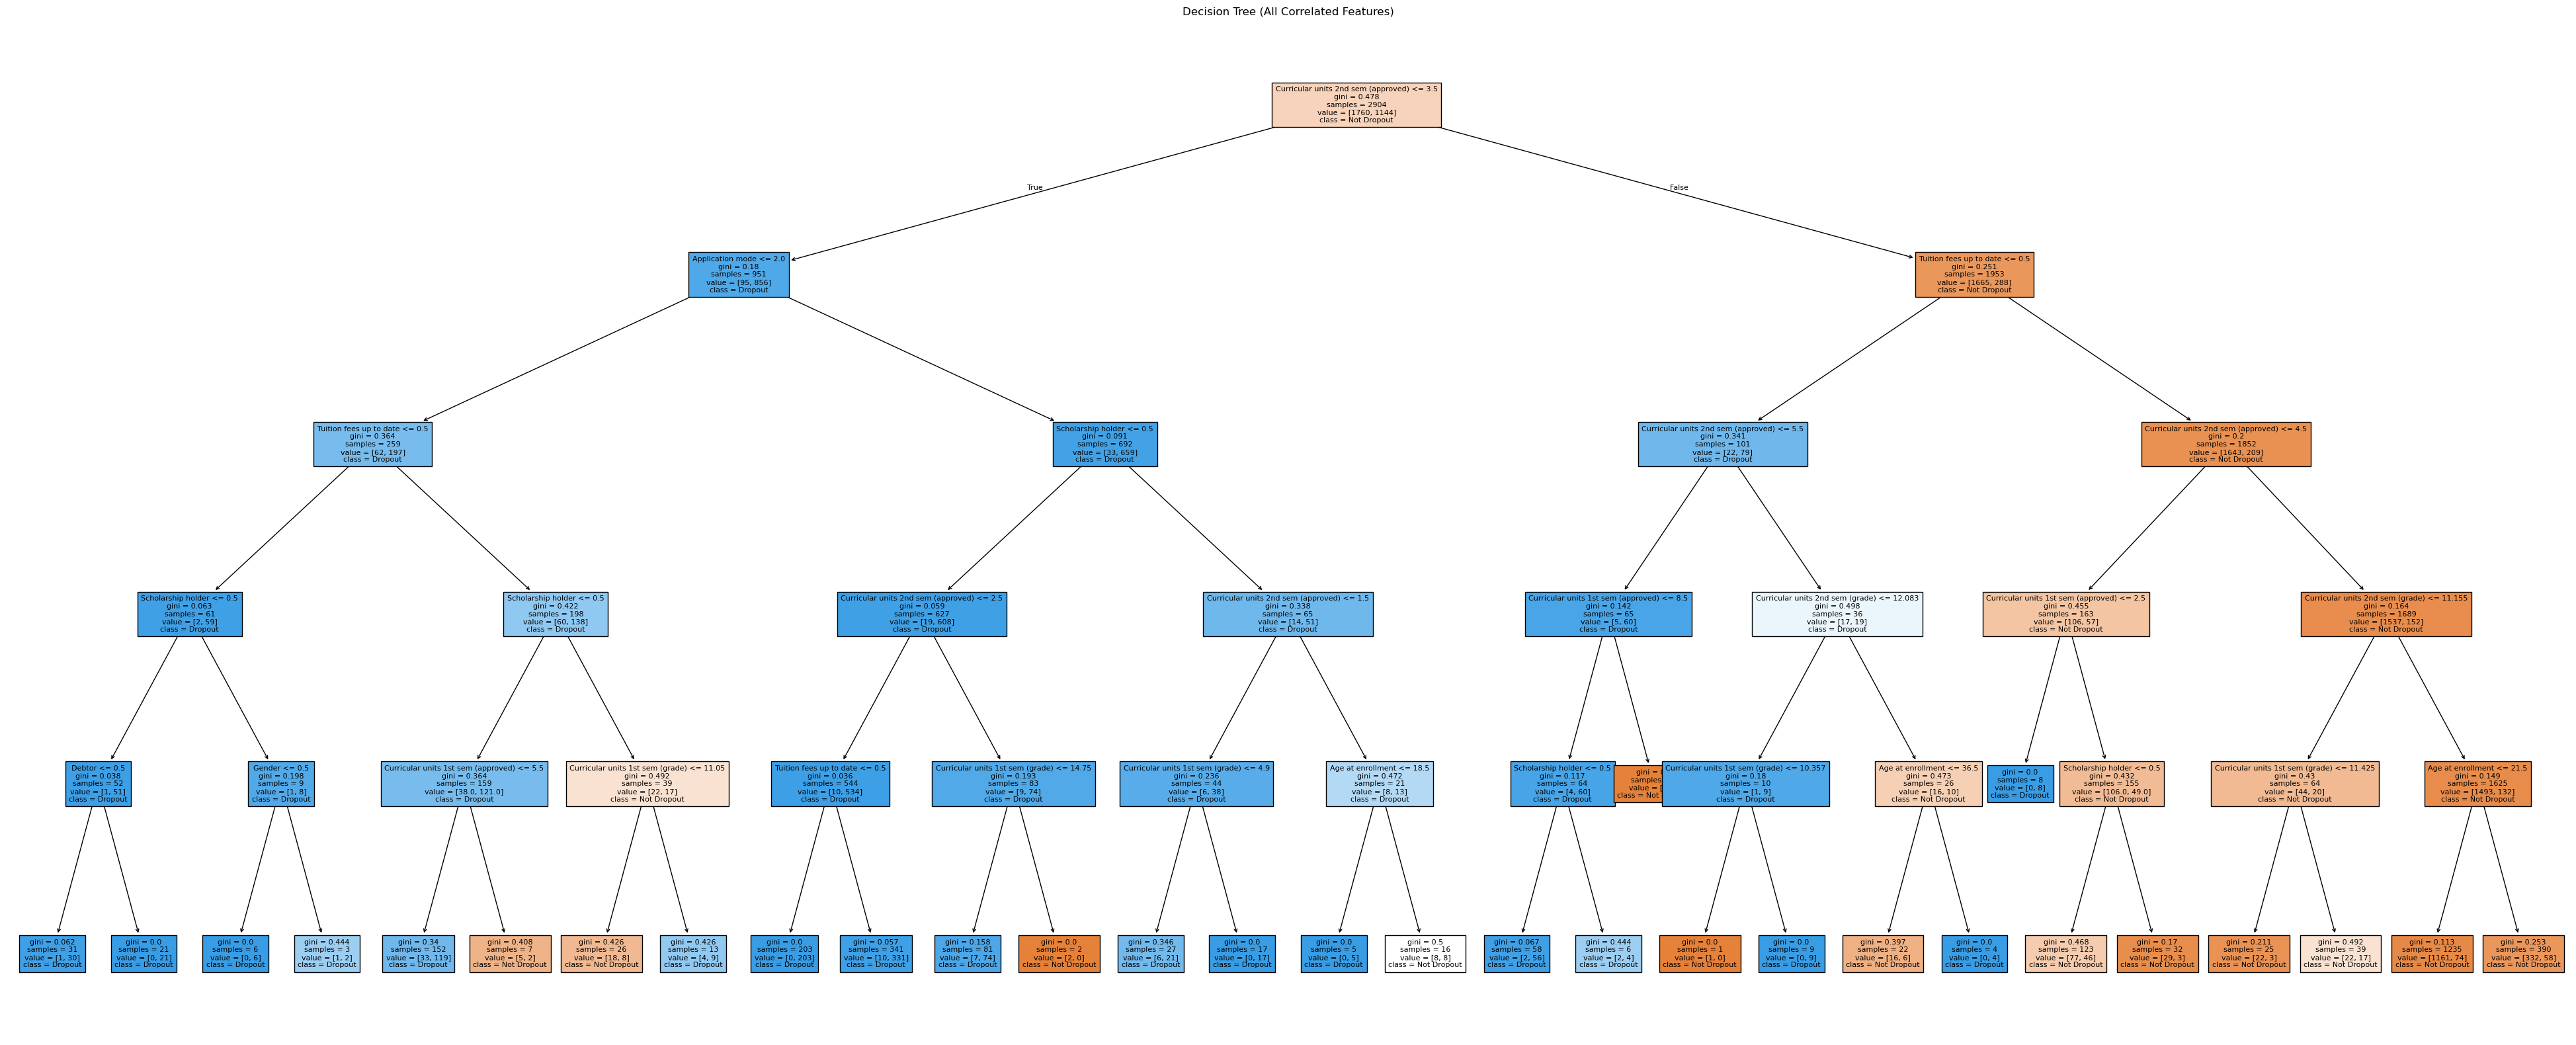

In [17]:
# Plot Decision Tree with all correlated features
plt.figure(figsize=(50, 20))
plot_tree(tree_all, feature_names=X_all.columns, class_names=["Not Dropout", "Dropout"], filled=True, fontsize=8)
plt.title("Decision Tree (All Correlated Features)")
plt.show()

now that we see that we can use just the data with the strong features to have a better understand of the problem of the dropouts we are goint to test this prediction on the students errolled to se with ones has the risk of droping out 

In [18]:
df_enrolled_strong = df_enrolled.copy()
X_enrolled = df_enrolled_strong[strong_features]
y_pred_enrolled= tree_strong.predict(X_enrolled)


# Adicionar as previsões no DataFrame
df_enrolled_strong['Risk of Dropout'] = y_pred_enrolled

# Verificar as previsões (1 significa que o aluno está em risco, 0 significa que não está)
print(df_enrolled_strong[['Curricular units 2nd sem (grade)', 'Tuition fees up to date', 'Risk of Dropout']].head())

    Curricular units 2nd sem (grade)  Tuition fees up to date  Risk of Dropout
16                            11.000                        1                1
19                            13.500                        1                0
21                            11.425                        1                0
25                            11.000                        1                0
27                            13.000                        1                0


In [19]:
# Filtrando os alunos em risco de abandono
students_at_risk_strong = df_enrolled_strong[df_enrolled_strong['Risk of Dropout'] == 1]

# Exibir os alunos em risco
students_at_risk_strong

Marital status  Application mode  Application order  Course  \
16                 1                 9                  1      10   
32                 1                 1                  1       9   
45                 1                 8                  1      17   
59                 1                 1                  3       2   
63                 1                 8                  1       5   
...              ...               ...                ...     ...   
4336               1                 1                  2      15   
4381               1                 1                  2      10   
4397               1                 3                  4      16   
4406               1                 1                  1       5   
4413               1                14                  1       1   

      Daytime/evening attendance  Previous qualification  Nacionality  \
16                             1                       1            1   
32                             1                       1            1   
45                             0                       1            1   
59                             1                       1            1   
63                             1                       1            1   
...                          ...                     ...          ...   
4336                           1                       1            1   
4381                           1                       1            1   
4397                           1                       1            1   
4406                           1                       1            1   
4413                           1                       1            1   

      Mother's qualification  Father's qualification  Mother's occupation  \
16                        13                      28                    6   
32                         1                       1                    5   
45                        23                      28                    5   
59                        23                      27                    5   
63                         1                       1                    4   
...                      ...                     ...                  ...   
4336                      22                      27                   10   
4381                       1                      14                    5   
4397                       3                      28                    4   
4406                       1                      28                    6   
4413                      22                       1                   10   

      ...  Curricular units 2nd sem (enrolled)  \
16    ...                                    6   
32    ...                                    5   
45    ...                                    5   
59    ...                                    0   
63    ...                                    6   
...   ...                                  ...   
4336  ...                                    6   
4381  ...                                    5   
4397  ...                                    6   
4406  ...                                    6   
4413  ...                                    8   

      Curricular units 2nd sem (evaluations)  \
16                                        14   
32                                         8   
45                                        11   
59                                         0   
63                                         8   
...                                      ...   
4336                                      12   
4381                                      11   
4397                                       9   
4406                                       8   
4413                                      10   

      Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
16                                      2                         11.000000   
32                                     

In [20]:
df_enrolled_all = df_enrolled.copy()
X_enrolled_all = df_enrolled_all.drop(columns=["Target"]) 
y_pred_enrolled_all = tree.predict(X_enrolled_all) 
df_enrolled_all['Risk of Dropout'] = y_pred_enrolled
# Filtrando os alunos em risco de abandono
students_at_risk_all = df_enrolled_all[df_enrolled_all['Risk of Dropout'] == 1]

# Exibir os alunos em risco
students_at_risk_all

Marital status  Application mode  Application order  Course  \
16                 1                 9                  1      10   
32                 1                 1                  1       9   
45                 1                 8                  1      17   
59                 1                 1                  3       2   
63                 1                 8                  1       5   
...              ...               ...                ...     ...   
4336               1                 1                  2      15   
4381               1                 1                  2      10   
4397               1                 3                  4      16   
4406               1                 1                  1       5   
4413               1                14                  1       1   

      Daytime/evening attendance  Previous qualification  Nacionality  \
16                             1                       1            1   
32                             1                       1            1   
45                             0                       1            1   
59                             1                       1            1   
63                             1                       1            1   
...                          ...                     ...          ...   
4336                           1                       1            1   
4381                           1                       1            1   
4397                           1                       1            1   
4406                           1                       1            1   
4413                           1                       1            1   

      Mother's qualification  Father's qualification  Mother's occupation  \
16                        13                      28                    6   
32                         1                       1                    5   
45                        23                      28                    5   
59                        23                      27                    5   
63                         1                       1                    4   
...                      ...                     ...                  ...   
4336                      22                      27                   10   
4381                       1                      14                    5   
4397                       3                      28                    4   
4406                       1                      28                    6   
4413                      22                       1                   10   

      ...  Curricular units 2nd sem (enrolled)  \
16    ...                                    6   
32    ...                                    5   
45    ...                                    5   
59    ...                                    0   
63    ...                                    6   
...   ...                                  ...   
4336  ...                                    6   
4381  ...                                    5   
4397  ...                                    6   
4406  ...                                    6   
4413  ...                                    8   

      Curricular units 2nd sem (evaluations)  \
16                                        14   
32                                         8   
45                                        11   
59                                         0   
63                                         8   
...                                      ...   
4336                                      12   
4381                                      11   
4397                                       9   
4406                                       8   
4413                                      10   

      Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
16                                      2                         11.000000   
32                                     

In [21]:
# Se o índice é o identificador dos alunos, você pode usar o próprio índice para fazer a junção
common_students = pd.merge(students_at_risk_all.reset_index(), students_at_risk_strong.reset_index(), on='index')

# Exibir o número de alunos em comum
print(f"Students in both lists: {len(common_students)}")

# Mostrar as primeiras linhas para visualizar os alunos em comum
common_students.head()


Students in both lists: 300


index  Marital status_x  Application mode_x  Application order_x  Course_x  \
0     16                 1                   9                    1        10   
1     32                 1                   1                    1         9   
2     45                 1                   8                    1        17   
3     59                 1                   1                    3         2   
4     63                 1                   8                    1         5   

   Daytime/evening attendance_x  Previous qualification_x  Nacionality_x  \
0                             1                         1              1   
1                             1                         1              1   
2                             0                         1              1   
3                             1                         1              1   
4                             1                         1              1   

   Mother's qualification_x  Father's qualification_x  ...  \
0                        13                        28  ...   
1                         1                         1  ...   
2                        23                        28  ...   
3                        23                        27  ...   
4                         1                         1  ...   

   Curricular units 2nd sem (enrolled)_y  \
0                                      6   
1                                      5   
2                                      5   
3                                      0   
4                                      6   

   Curricular units 2nd sem (evaluations)_y  \
0                                        14   
1                                         8   
2                                        11   
3                                         0   
4                                         8   

   Curricular units 2nd sem (approved)_y  Curricular units 2nd sem (grade)_y  \
0                                      2                           11.000000   
1                                      2                           13.500000   
2                                      3                           14.333333   
3                                      0                            0.000000   
4                                      1                           10.000000   

   Curricular units 2nd sem (without evaluations)_y  Unemployment rate_y  \
0                                                 0                 10.8   
1                                                 0                  8.9   
2                                                 1                  7.6   
3                                                 0                  7.6   
4                                                 0                 10.8   

   Inflation rate_y  GDP_y  Target_y  Risk of Dropout_y  
0               1.4   1.74  Enrolled                  1  
1               1.4   3.51  Enrolled                  1  
2               2.6   0.32  Enrolled                  1  
3               2.6   0.32  Enrolled                  1  
4               1.4   1.74  Enrolled                  1  

[5 rows x 73 columns]

In [22]:
# Alunos exclusivos de students_at_risk_all
exclusive_all = students_at_risk_all[~students_at_risk_all.index.isin(students_at_risk_strong.index)]

# Alunos exclusivos de students_at_risk_strong
exclusive_strong = students_at_risk_strong[~students_at_risk_strong.index.isin(students_at_risk_all.index)]

print(f"Students only in 'students_at_risk_all': {len(exclusive_all)}")
print(f"Students only in 'students_at_risk_strong': {len(exclusive_strong)}")


Students only in 'students_at_risk_all': 0
Students only in 'students_at_risk_strong': 0


In [23]:
print(f"Number of students at risk (all features): {len(students_at_risk_all)}")
print(f"Number of students at risk (strong features): {len(students_at_risk_strong)}")


Number of students at risk (all features): 300
Number of students at risk (strong features): 300


## graduate 

In [24]:

df_new_graduate["Graduate"] = df_new_graduate["Target"].apply(lambda x: 1 if x == "Graduate" else 0)

df_new_graduate.drop(columns=["Target"], inplace=True)
df_new_graduate

Marital status  Application mode  Application order  Course  \
0                  1                 8                  5       2   
1                  1                 6                  1      11   
2                  1                 1                  5       5   
3                  1                 8                  2      15   
4                  2                12                  1       3   
...              ...               ...                ...     ...   
4419               1                 1                  6      15   
4420               1                 1                  2      15   
4421               1                 1                  1      12   
4422               1                 1                  1       9   
4423               1                 5                  1      15   

      Daytime/evening attendance  Previous qualification  Nacionality  \
0                              1                       1            1   
1                              1                       1            1   
2                              1                       1            1   
3                              1                       1            1   
4                              0                       1            1   
...                          ...                     ...          ...   
4419                           1                       1            1   
4420                           1                       1           19   
4421                           1                       1            1   
4422                           1                       1            1   
4423                           1                       1            9   

      Mother's qualification  Father's qualification  Mother's occupation  \
0                         13                      10                    6   
1                          1                       3                    4   
2                         22                      27                   10   
3                         23                      27                    6   
4                         22                      28                   10   
...                      ...                     ...                  ...   
4419                       1                       1                    6   
4420                       1                       1                   10   
4421                      22                      27                   10   
4422                      22                      27                    8   
4423                      23                      27                    6   

      ...  Curricular units 2nd sem (credited)  \
0     ...                                    0   
1     ...                                    0   
2     ...                                    0   
3     ...                                    0   
4     ...                                    0   
...   ...                                  ...   
4419  ...                                    0   
4420  ...                                    0   
4421  ...                                    0   
4422  ...                                    0   
4423  ...                                    0   

      Curricular units 2nd sem (enrolled)  \
0                                       0   
1                                       6   
2                                       6   
3                                       6   
4                                       6   
...                                   ...   
4419                                    6   
4420                                    6   
4421                                    8   
4422                                    5   
4423                                    6   

      Curricular units 2nd sem (evaluations)  \
0                                          0   
1                                          6   
2                                          0   
3                                        

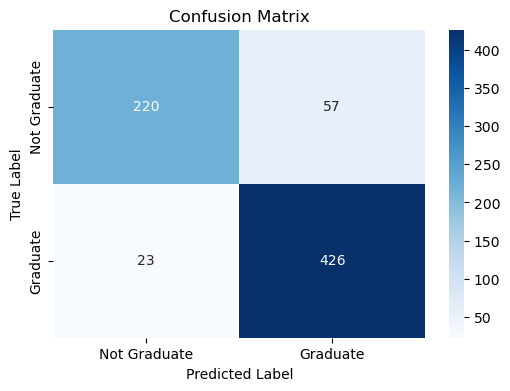

Accuracy: 0.8898071625344353
Classification Report:
               precision    recall  f1-score   support

Not Graduate       0.91      0.79      0.85       277
    Graduate       0.88      0.95      0.91       449

    accuracy                           0.89       726
   macro avg       0.89      0.87      0.88       726
weighted avg       0.89      0.89      0.89       726



In [25]:
df_new_graduate = pd.get_dummies(df_new_graduate, drop_first=True)

Xg = df_new_graduate.drop(columns=["Graduate"])  
yg= df_new_graduate["Graduate"]  

Xg_train, Xg_test, yg_train, yg_test = train_test_split(Xg, yg, test_size=0.2, random_state=42)

treeg = DecisionTreeClassifier(max_depth=5, random_state=42)  # max_depth evita overfitting

# Treinar o modelo
treeg.fit(Xg_train, yg_train)

# Make predictions on the test set
yg_pred = treeg.predict(Xg_test)

cmg = confusion_matrix(yg_test, yg_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(cmg, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Graduate", "Graduate"], yticklabels=["Not Graduate", "Graduate"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Exibir métricas de desempenho
print("Accuracy:", accuracy_score(yg_test, yg_pred))

# Exibir relatório de classificação (Precision, Recall, F1-Score)
reportg = classification_report(yg_test, yg_pred, target_names=["Not Graduate", "Graduate"])
print("Classification Report:\n", reportg)

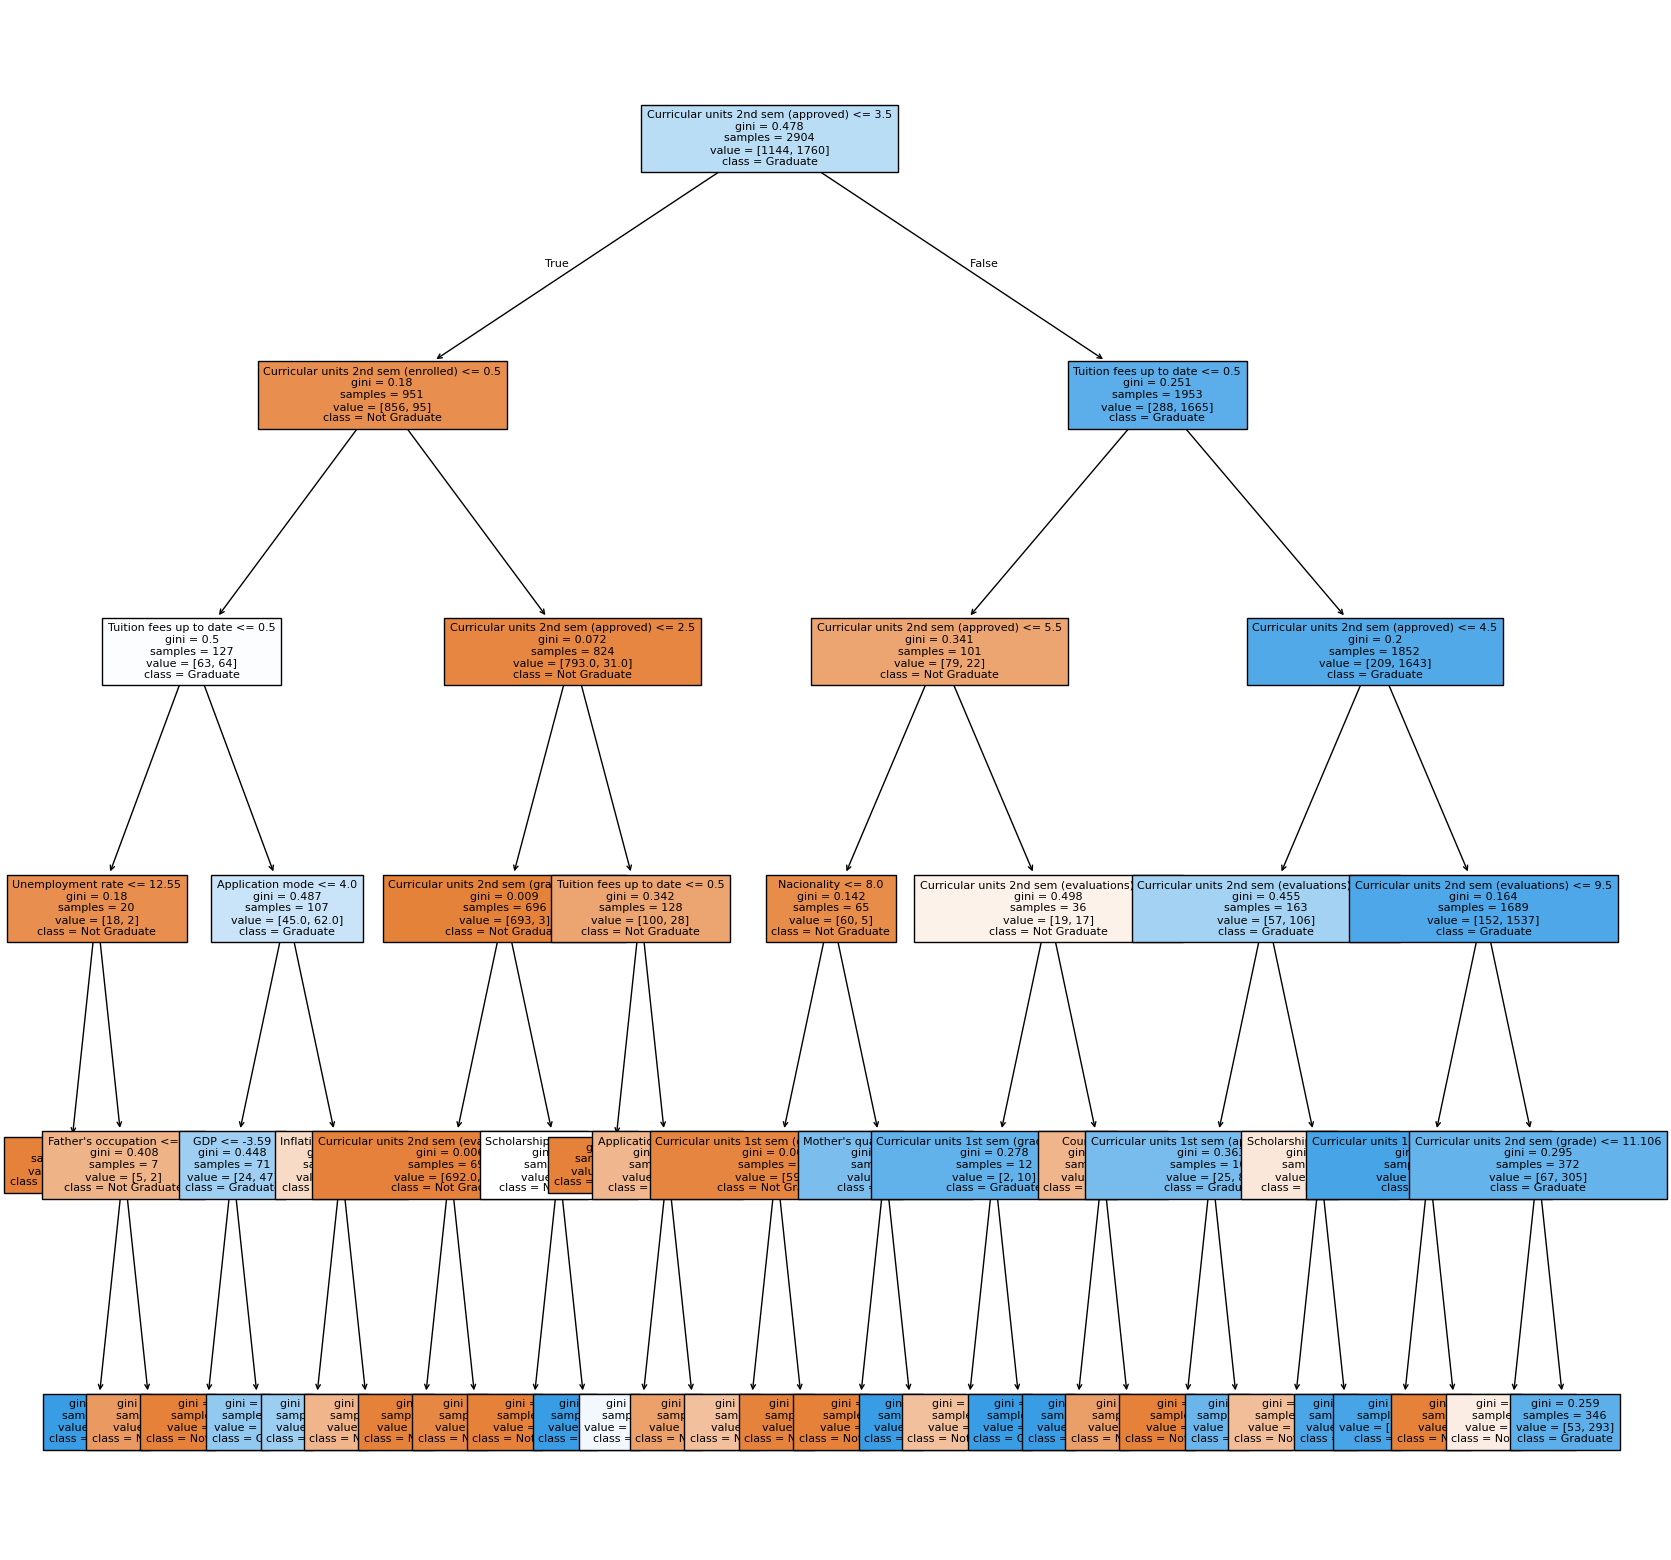

In [26]:
plt.figure(figsize=(20, 20))
plot_tree(treeg, feature_names=X.columns, class_names=["Not Graduate", "Graduate"], filled=True, fontsize=8)
plt.show()

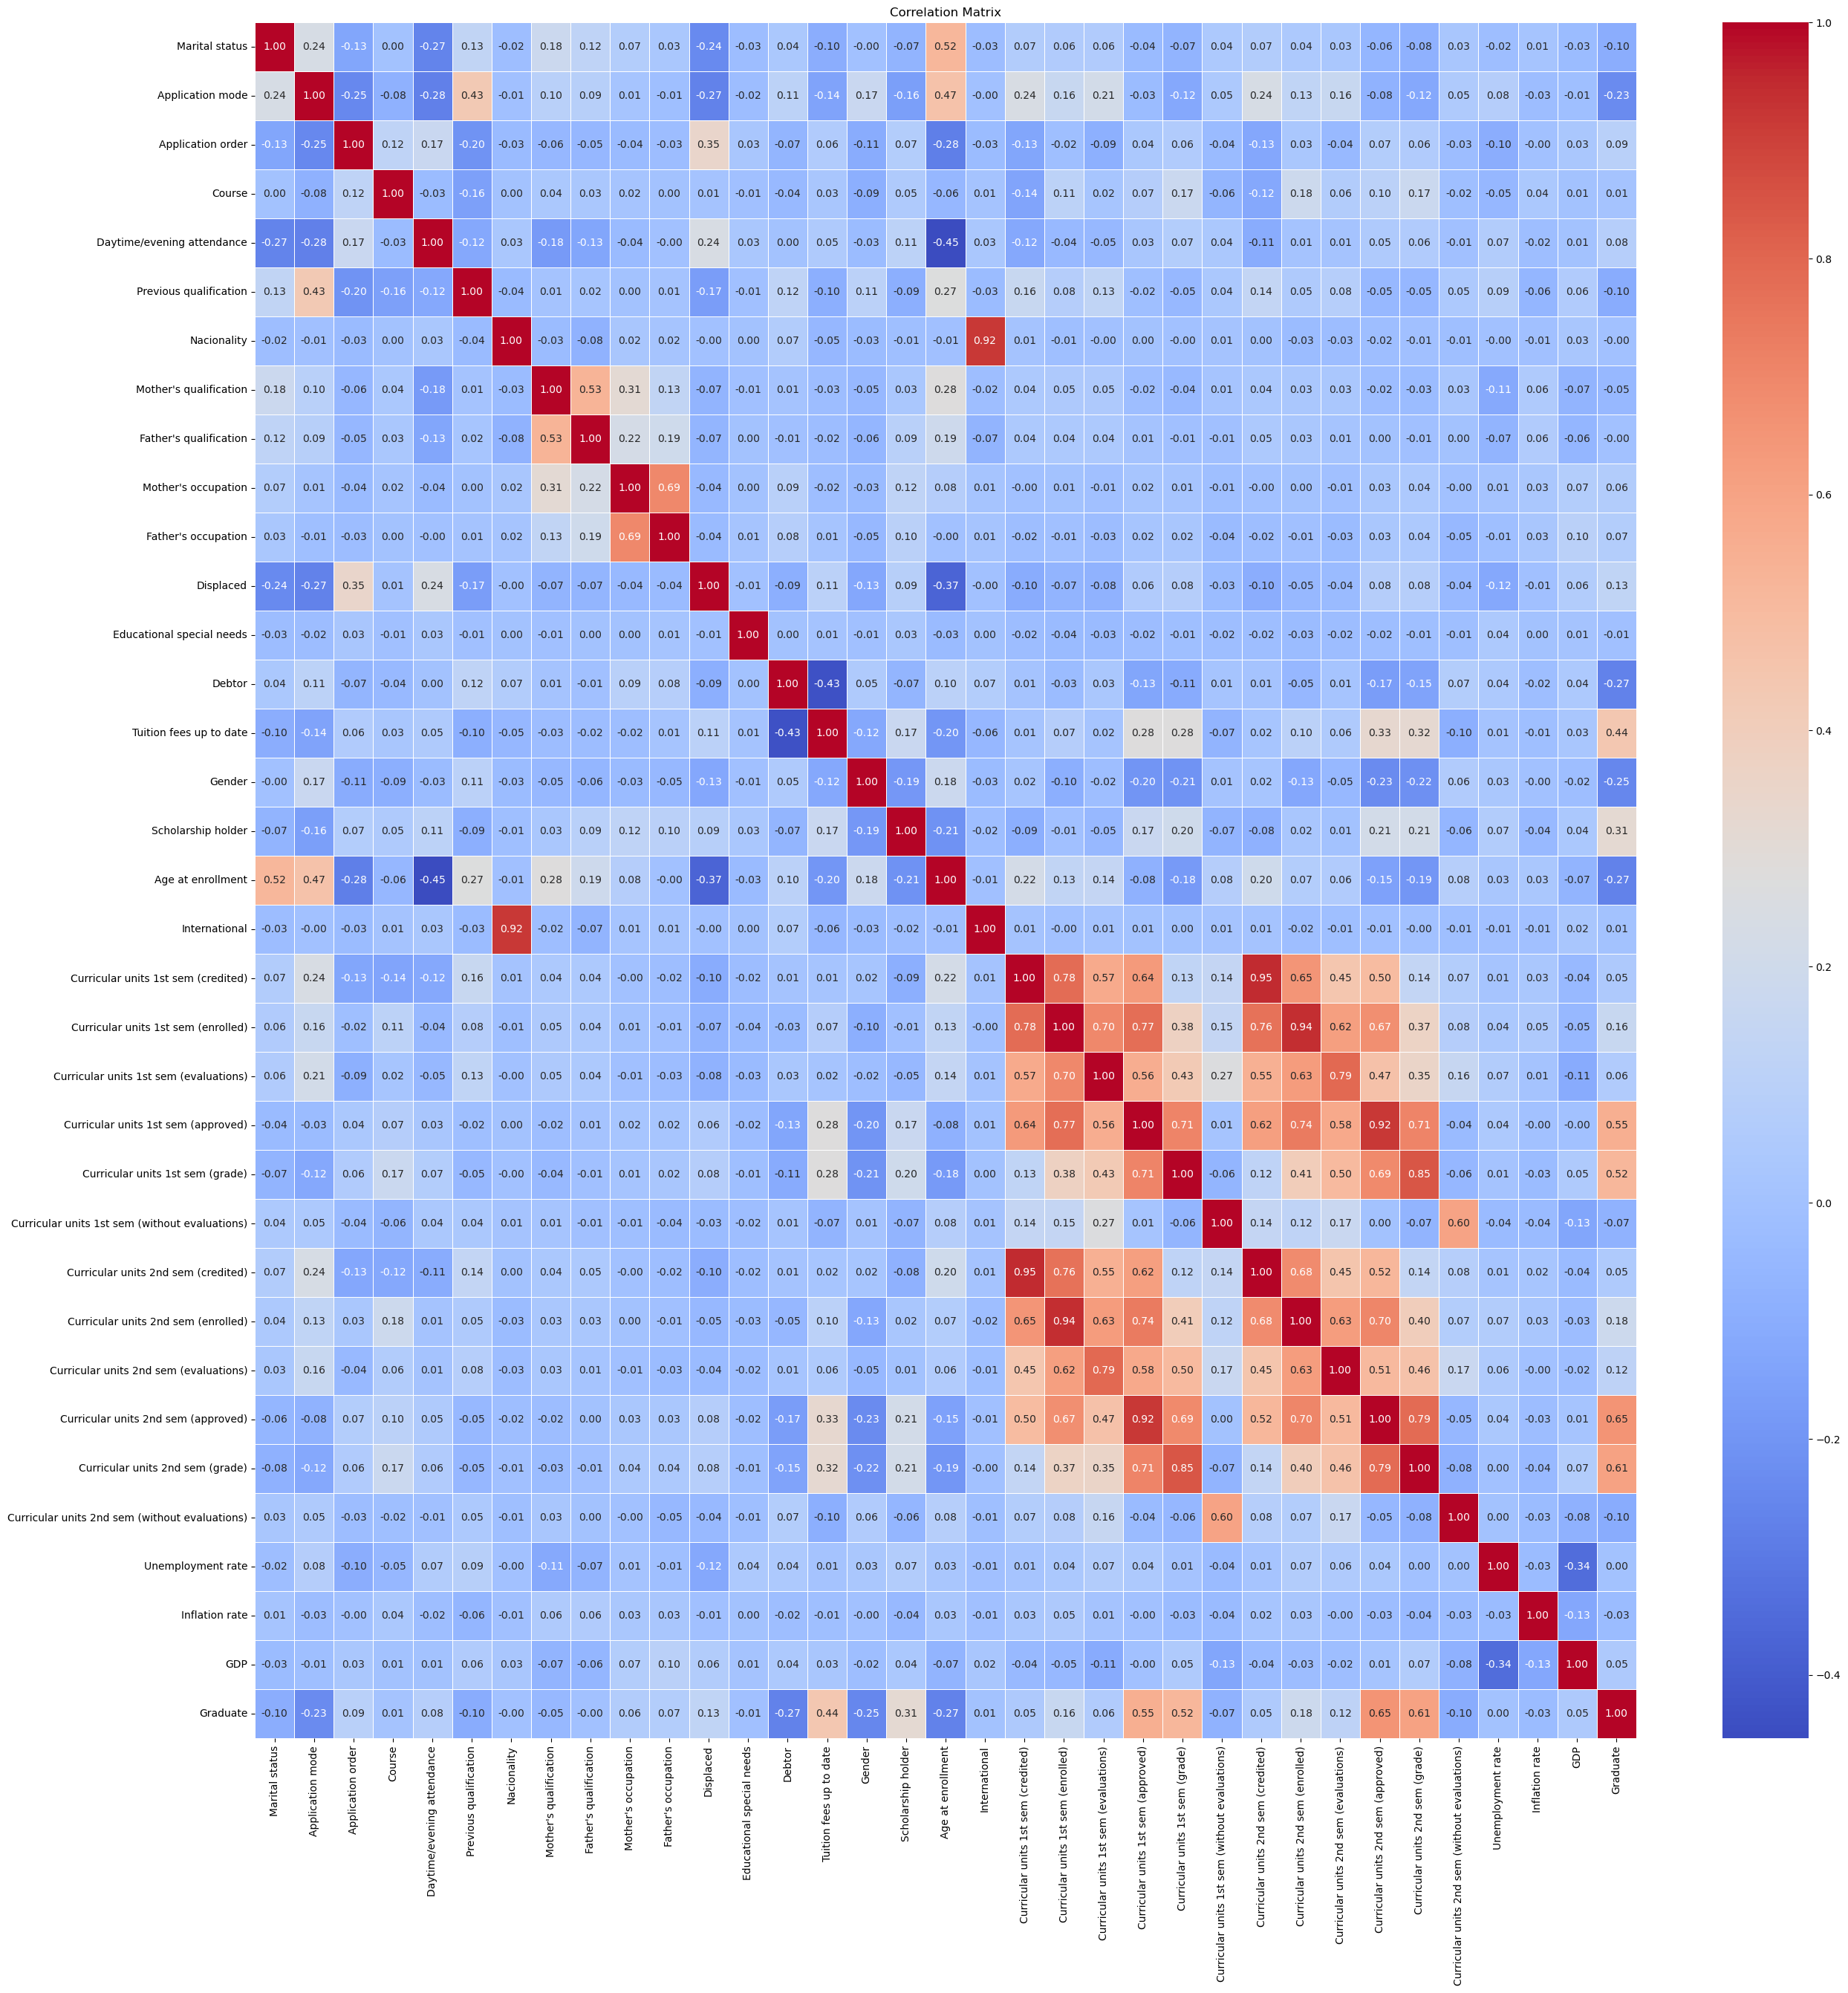

In [27]:
corr_matrixg = df_new_graduate.corr()

# Plotar a matriz de correlação
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrixg, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [28]:
# Features with the strongest correlation
strong_featuresg = [
    "Curricular units 2nd sem (grade)", 
    "Curricular units 2nd sem (approved)", 
    "Scholarship holder", 
    "Tuition fees up to date",
    "Curricular units 1st sem (grade)", 
    "Curricular units 1st sem (approved)", 
]

# Features with moderate correlation
moderate_features = [
    "Age at enrollment", 
    "Gender", 
    "Debtor", 
    "Application mode"
]

# Creating two feature sets
Xg_strong = df_new_graduate[strong_featuresg]  # Only strong correlation features
Xg_all = df_new_graduate[strong_featuresg + moderate_features]  # Strong + moderate correlation features
yg = df_new_graduate["Graduate"]  # Target variable

In [29]:
# Splitting data for both models
Xg_train_strong, Xg_test_strong, yg_train_strong, yg_test_strong = train_test_split(Xg_strong, yg, test_size=0.2, random_state=42)
Xg_train_all, Xg_test_all, yg_train_all, yg_test_all = train_test_split(Xg_all, yg, test_size=0.2, random_state=42)

In [30]:
treeg_strong = DecisionTreeClassifier(max_depth=5, random_state=42)
treeg_all = DecisionTreeClassifier(max_depth=5, random_state=42)

treeg_strong.fit(Xg_train_strong, yg_train_strong)
treeg_all.fit(Xg_train_all, yg_train_all)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [31]:
# Predictions
yg_pred_strong = treeg_strong.predict(Xg_test_strong)
yg_pred_all = treeg_all.predict(Xg_test_all)

In [32]:
# Metrics for the model with strong correlation features
print("Decision Tree with Strong Features:")
print("Accuracy:", accuracy_score(yg_test_strong, yg_pred_strong))
print("Confusion Matrix:\n", confusion_matrix(yg_test_strong, yg_pred_strong))
print("Classification Report:\n", classification_report(yg_test_strong, yg_pred_strong))

Decision Tree with Strong Features:
Accuracy: 0.8911845730027548
Confusion Matrix:
 [[216  61]
 [ 18 431]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.78      0.85       277
           1       0.88      0.96      0.92       449

    accuracy                           0.89       726
   macro avg       0.90      0.87      0.88       726
weighted avg       0.89      0.89      0.89       726



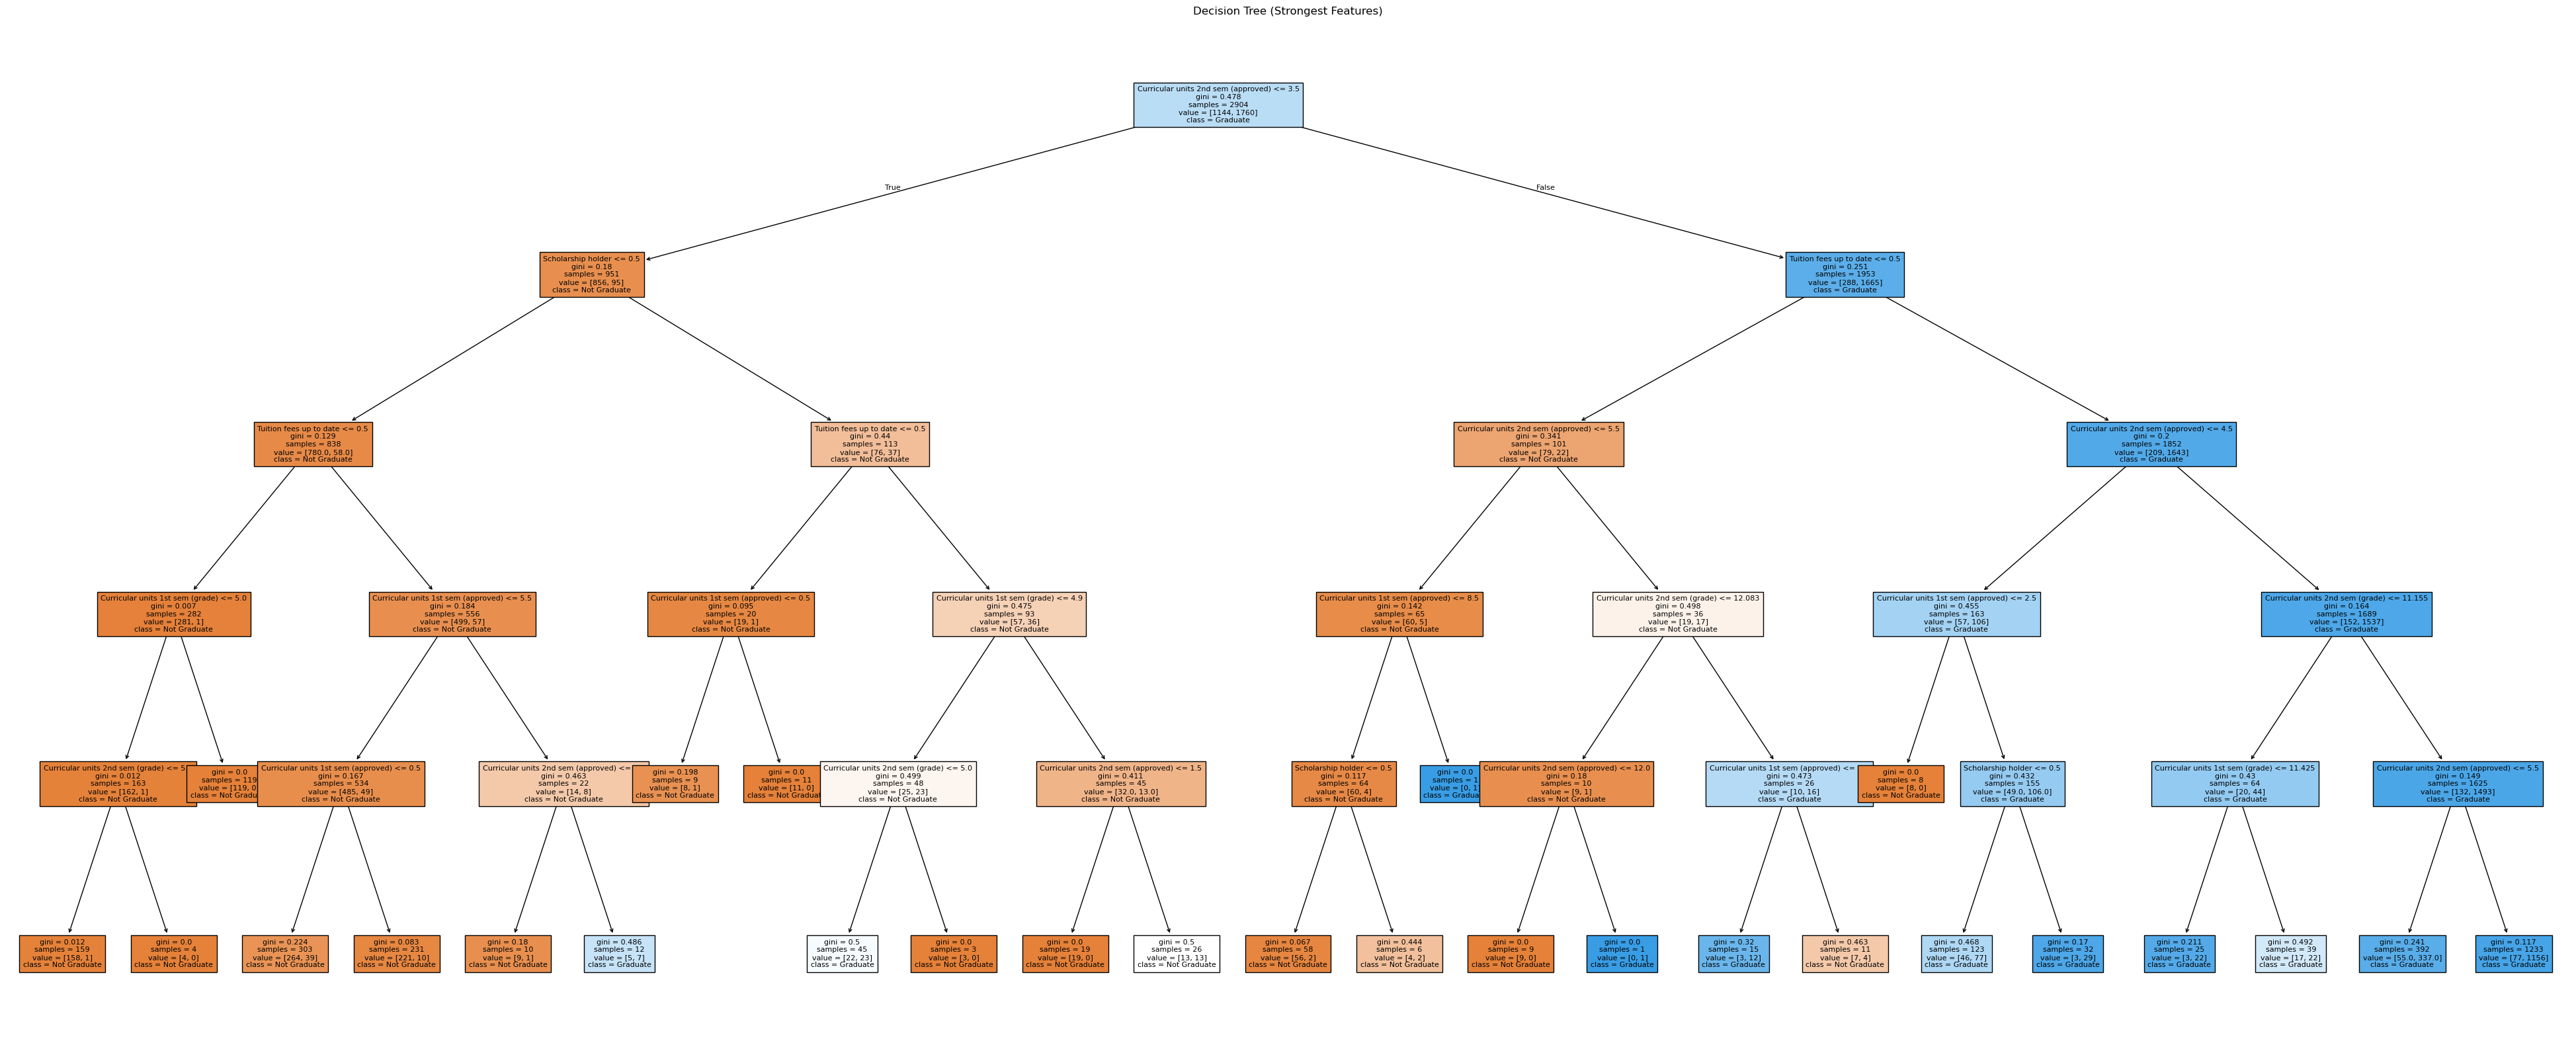

In [33]:
# Plot Decision Tree with strong features
plt.figure(figsize=(50, 20))
plot_tree(treeg_strong, feature_names=X_strong.columns, class_names=["Not Graduate", "Graduate"], filled=True, fontsize=8)
plt.title("Decision Tree (Strongest Features)")
plt.show()

In [34]:
# Metrics for the model with all relevant features
print("\nDecision Tree with All Correlated Features:")
print("Accuracy:", accuracy_score(yg_test_all, yg_pred_all))
print("Confusion Matrix:\n", confusion_matrix(yg_test_all, yg_pred_all))
print("Classification Report:\n", classification_report(yg_test_all, yg_pred_all))


Decision Tree with All Correlated Features:
Accuracy: 0.8884297520661157
Confusion Matrix:
 [[213  64]
 [ 17 432]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.77      0.84       277
           1       0.87      0.96      0.91       449

    accuracy                           0.89       726
   macro avg       0.90      0.87      0.88       726
weighted avg       0.89      0.89      0.89       726



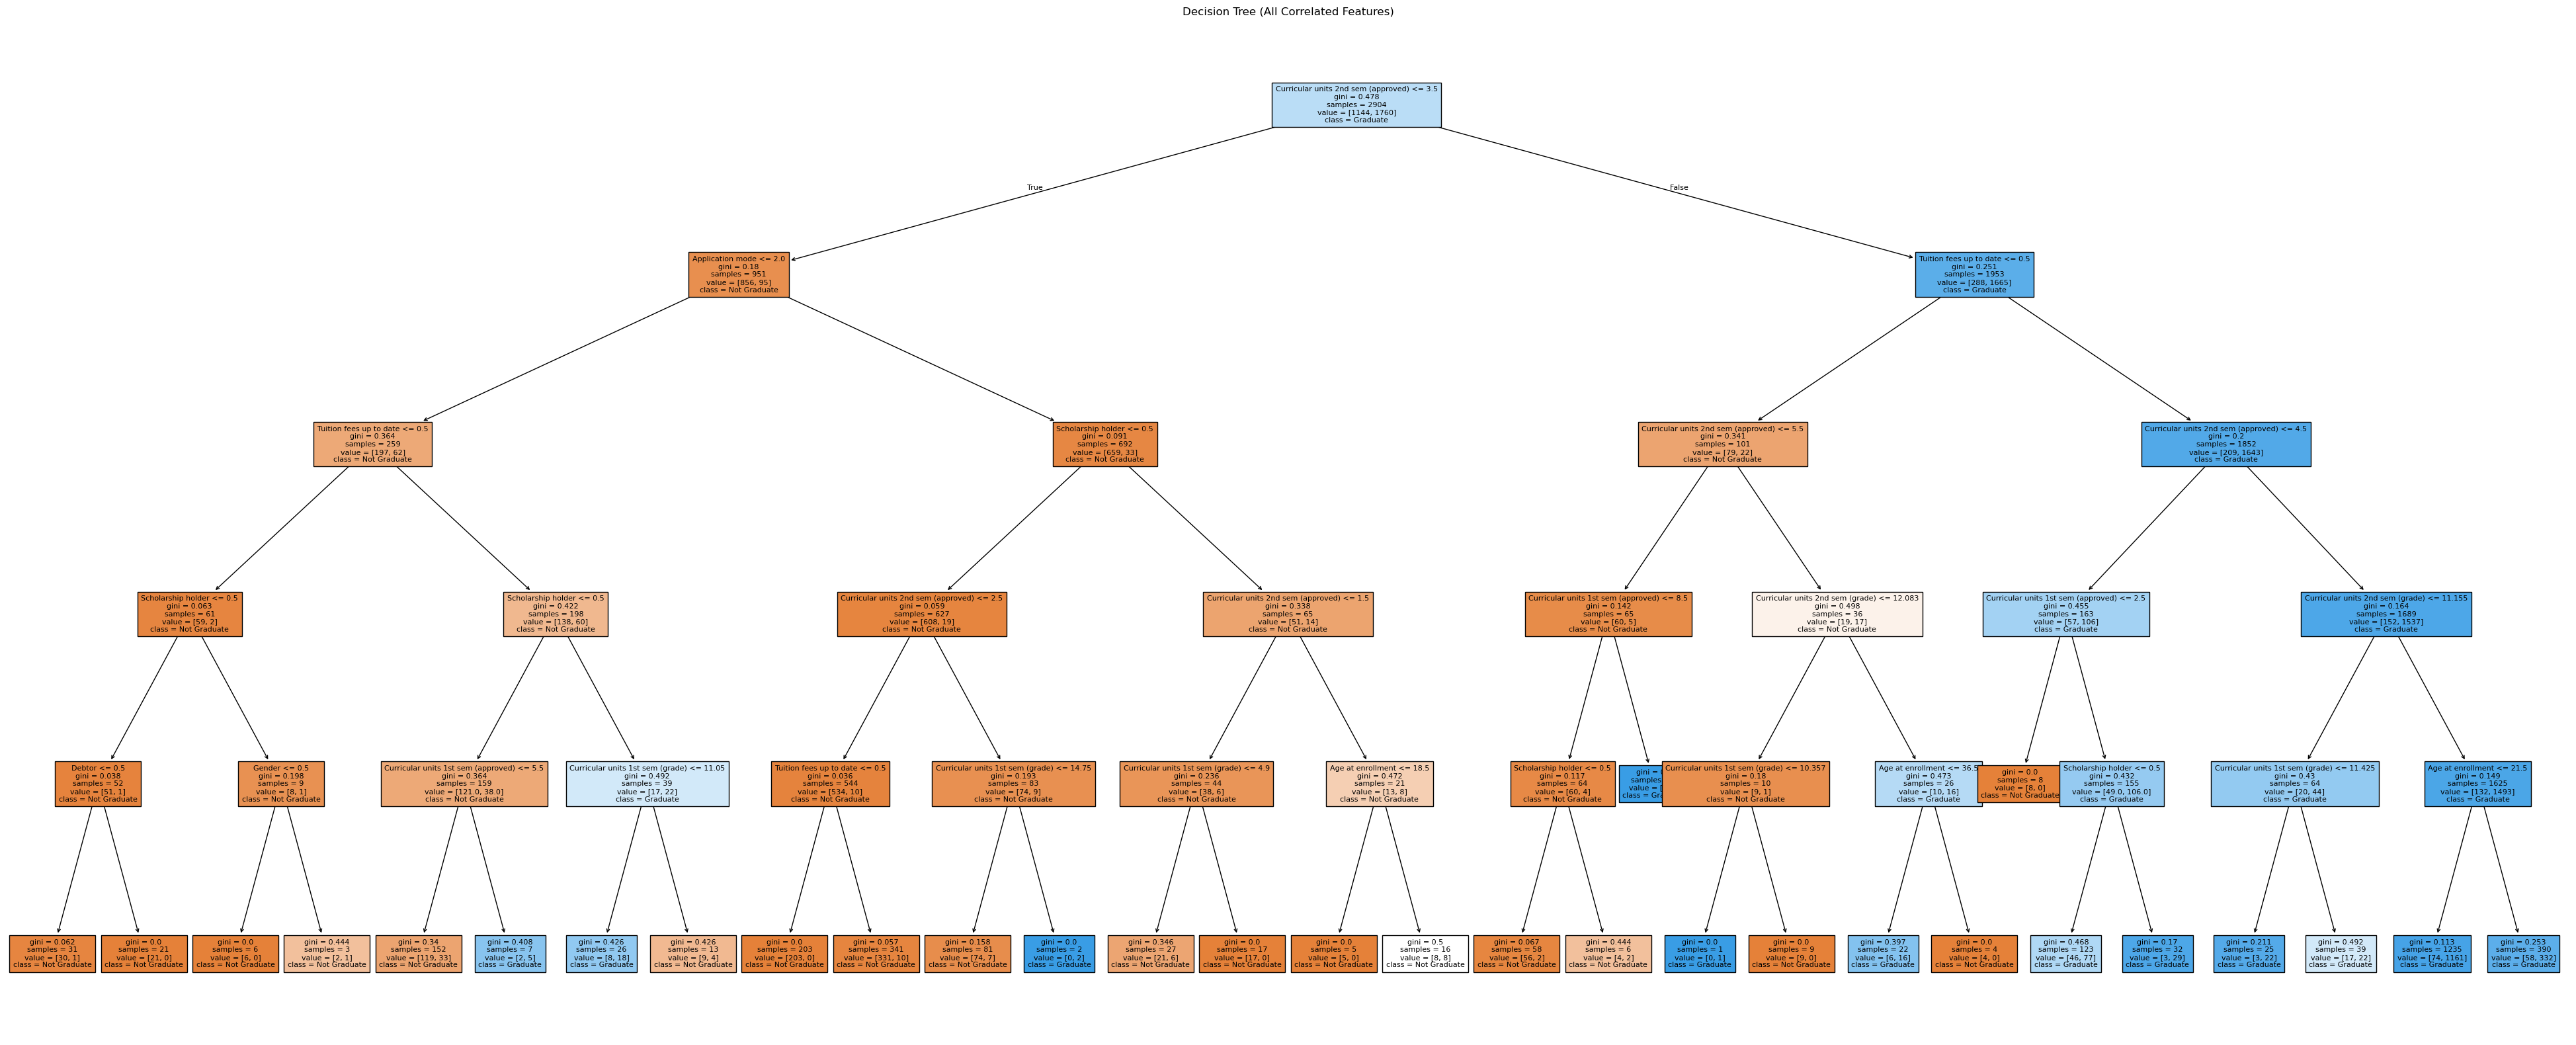

In [35]:
# Plot Decision Tree with all correlated features
plt.figure(figsize=(50, 20))
plot_tree(treeg_all, feature_names=X_all.columns, class_names=["Not Graduate", "Graduate"], filled=True, fontsize=8)
plt.title("Decision Tree (All Correlated Features)")
plt.show()

In [36]:
dfg_enrolled_strong = df_enrolled.copy()
Xg_enrolled = dfg_enrolled_strong[strong_featuresg]
yg_pred_enrolled= treeg_strong.predict(Xg_enrolled)


# Adicionar as previsões no DataFrame
dfg_enrolled_strong['Prob of graduate'] = yg_pred_enrolled

# Verificar as previsões (1 significa que o aluno está em risco, 0 significa que não está)
print(dfg_enrolled_strong[['Curricular units 2nd sem (grade)', 'Tuition fees up to date', 'Prob of graduate']].head())

    Curricular units 2nd sem (grade)  Tuition fees up to date  \
16                            11.000                        1   
19                            13.500                        1   
21                            11.425                        1   
25                            11.000                        1   
27                            13.000                        1   

    Prob of graduate  
16                 0  
19                 1  
21                 1  
25                 1  
27                 1  


In [37]:
# Filtrando os alunos em risco de abandono
studentsg_strong = dfg_enrolled_strong[dfg_enrolled_strong['Prob of graduate'] == 1] 

# Exibir os alunos em risco
studentsg_strong

Marital status  Application mode  Application order  Course  \
19                 1                 1                  1      16   
21                 1                 9                  4      13   
25                 1                 1                  1      10   
27                 1                 1                  1       6   
29                 1                 8                  2      12   
...              ...               ...                ...     ...   
4373               1                 1                  1      10   
4391               2                 4                  1      12   
4392               1                 1                  1       9   
4402               1                 9                  2      16   
4412               1                14                  1       5   

      Daytime/evening attendance  Previous qualification  Nacionality  \
19                             1                       1            1   
21                             1                       1            1   
25                             1                       1            1   
27                             1                       1            1   
29                             1                       1            1   
...                          ...                     ...          ...   
4373                           1                       1            1   
4391                           1                       3            1   
4392                           1                       1            1   
4402                           1                       1            1   
4412                           1                       1            1   

      Mother's qualification  Father's qualification  Mother's occupation  \
19                        13                      14                    8   
21                         1                      28                    5   
25                        13                      28                   10   
27                        13                      14                    4   
29                         3                       3                    2   
...                      ...                     ...                  ...   
4373                      22                      27                    8   
4391                      22                      27                   10   
4392                      22                       1                    5   
4402                       1                      14                    4   
4412                      13                      14                    8   

      ...  Curricular units 2nd sem (enrolled)  \
19    ...                                    7   
21    ...                                    8   
25    ...                                    6   
27    ...                                    5   
29    ...                                    7   
...   ...                                  ...   
4373  ...                                    6   
4391  ...                                    8   
4392  ...                                    5   
4402  ...                                    6   
4412  ...                                    6   

      Curricular units 2nd sem (evaluations)  \
19                                         8   
21                                         9   
25                                        12   
27                                         7   
29                                         7   
...                                      ...   
4373                                       9   
4391                                      11   
4392                                       8   
4402                                       6   
4412                                       7   

      Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
19                                      6                         13.500000   
21                                     

# Better understand students' academic progress and identify areas of improvement from both an individual and institutional perspective (develop targeted courses, activities, or initiatives that enhance academic performance more effectively and efficiently).

In [38]:
yg_pred_strong_prob = treeg_strong.predict_proba(Xg_enrolled)[:, 1]  # Probabilities of graduating (class 1)
dfg_enrolled_strong['Prob of Graduation'] = yg_pred_strong_prob
dfg_enrolled_strong

Marital status  Application mode  Application order  Course  \
16                 1                 9                  1      10   
19                 1                 1                  1      16   
21                 1                 9                  4      13   
25                 1                 1                  1      10   
27                 1                 1                  1       6   
...              ...               ...                ...     ...   
4397               1                 3                  4      16   
4402               1                 9                  2      16   
4406               1                 1                  1       5   
4412               1                14                  1       5   
4413               1                14                  1       1   

      Daytime/evening attendance  Previous qualification  Nacionality  \
16                             1                       1            1   
19                             1                       1            1   
21                             1                       1            1   
25                             1                       1            1   
27                             1                       1            1   
...                          ...                     ...          ...   
4397                           1                       1            1   
4402                           1                       1            1   
4406                           1                       1            1   
4412                           1                       1            1   
4413                           1                       1            1   

      Mother's qualification  Father's qualification  Mother's occupation  \
16                        13                      28                    6   
19                        13                      14                    8   
21                         1                      28                    5   
25                        13                      28                   10   
27                        13                      14                    4   
...                      ...                     ...                  ...   
4397                       3                      28                    4   
4402                       1                      14                    4   
4406                       1                      28                    6   
4412                      13                      14                    8   
4413                      22                       1                   10   

      ...  Curricular units 2nd sem (evaluations)  \
16    ...                                      14   
19    ...                                       8   
21    ...                                       9   
25    ...                                      12   
27    ...                                       7   
...   ...                                     ...   
4397  ...                                       9   
4402  ...                                       6   
4406  ...                                       8   
4412  ...                                       7   
4413  ...                                      10   

      Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
16                                      2                         11.000000   
19                                      6                         13.500000   
21                                      8                         11.425000   
25                                      4                         11.000000   
27                                      4                         13.000000   
...                                   ...                               ...   
4397                                    3                         11.666667   
4402                                    6                         13.000000   
4406                       

In [39]:
importance_scores = treeg_strong.feature_importances_

# Create a DataFrame with feature names and their corresponding importance scores
importance_df = pd.DataFrame({
    'Feature': Xg_enrolled.columns,  # Assuming Xg_enrolled is your feature set
    'Importance': importance_scores
})
# Identify students at risk based on predicted outcomes
at_risk_students = dfg_enrolled_strong[dfg_enrolled_strong['Prob of Graduation'] < 0.4]
prob_graduating = dfg_enrolled_strong[dfg_enrolled_strong['Prob of Graduation'] > 0.4]
# Check the risk factors for at-risk students (e.g., grades, tuition, engagement)
at_risk_students_analysis = at_risk_students[strong_featuresg]
prob_graduating_analysis = prob_graduating[strong_featuresg]
# Analyze what features contribute the most to their risk of not graduating
important_features_for_at_risk = importance_df[['Feature', 'Importance']]
# Display the students at risk and their specific risk factors
print("At-Risk Students:")
at_risk_students_analysis

At-Risk Students:


Curricular units 2nd sem (grade)  Curricular units 2nd sem (approved)  \
16                           11.000000                                    2   
32                           13.500000                                    2   
45                           14.333333                                    3   
59                            0.000000                                    0   
63                           10.000000                                    1   
...                                ...                                  ...   
4336                         17.000000                                    1   
4381                          0.000000                                    0   
4397                         11.666667                                    3   
4406                         11.333333                                    2   
4413                         13.000000                                    2   

      Scholarship holder  Tuition fees up to date  \
16                     0                        1   
32                     0                        0   
45                     0                        1   
59                     0                        1   
63                     0                        1   
...                  ...                      ...   
4336                   0                        1   
4381                   0                        1   
4397                   0                        1   
4406                   0                        1   
4413                   0                        1   

      Curricular units 1st sem (grade)  Curricular units 1st sem (approved)  
16                           12.000000                                    1  
32                           11.333333                                    3  
45                           11.500000                                    2  
59                            0.000000                                    0  
63                           11.400000                                    5  
...                                ...                                  ...  
4336                         17.000000                                    1  
4381                          0.000000                                    0  
4397                         12.600000                                    5  
4406                         12.000000                                    4  
4413                         11.600000                                    5  

[300 rows x 6 columns]

In [40]:
important_features_for_at_risk

Feature  Importance
0     Curricular units 2nd sem (grade)    0.013072
1  Curricular units 2nd sem (approved)    0.841175
2                   Scholarship holder    0.020046
3              Tuition fees up to date    0.102462
4     Curricular units 1st sem (grade)    0.005196
5  Curricular units 1st sem (approved)    0.018050

In [41]:
prob_graduating_analysis

Curricular units 2nd sem (grade)  Curricular units 2nd sem (approved)  \
19                           13.500000                                    6   
21                           11.425000                                    8   
25                           11.000000                                    4   
27                           13.000000                                    4   
29                           13.716667                                    6   
...                                ...                                  ...   
4373                         10.833333                                    6   
4391                         12.063750                                    7   
4392                         11.000000                                    5   
4402                         13.000000                                    6   
4412                         12.200000                                    5   

      Scholarship holder  Tuition fees up to date  \
19                     0                        1   
21                     0                        1   
25                     1                        1   
27                     0                        1   
29                     0                        1   
...                  ...                      ...   
4373                   0                        1   
4391                   0                        1   
4392                   0                        1   
4402                   0                        1   
4412                   1                        1   

      Curricular units 1st sem (grade)  Curricular units 1st sem (approved)  
19                           11.666667                                    6  
21                           11.437500                                    7  
25                           11.600000                                    5  
27                           12.666667                                    5  
29                           12.933333                                    6  
...                                ...                                  ...  
4373                         13.000000                                    2  
4391                         13.761111                                    7  
4392                         11.250000                                    4  
4402                         12.600000                                    5  
4412                         13.000000                                    4  

[494 rows x 6 columns]

/var/folders/mg/trj2dw9n74q5lcbvnrpm0lkw0000gn/T/ipykernel_62266/3649653964.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dropout_students[feature], label='Dropout Students', shade=True, ax=axes[i])
/var/folders/mg/trj2dw9n74q5lcbvnrpm0lkw0000gn/T/ipykernel_62266/3649653964.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(graduating_students[feature], label='Graduating Students', shade=True, ax=axes[i])
/var/folders/mg/trj2dw9n74q5lcbvnrpm0lkw0000gn/T/ipykernel_62266/3649653964.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dropout_students[feature], label='Dropout Students', shade=True, ax=axes[i])
/var

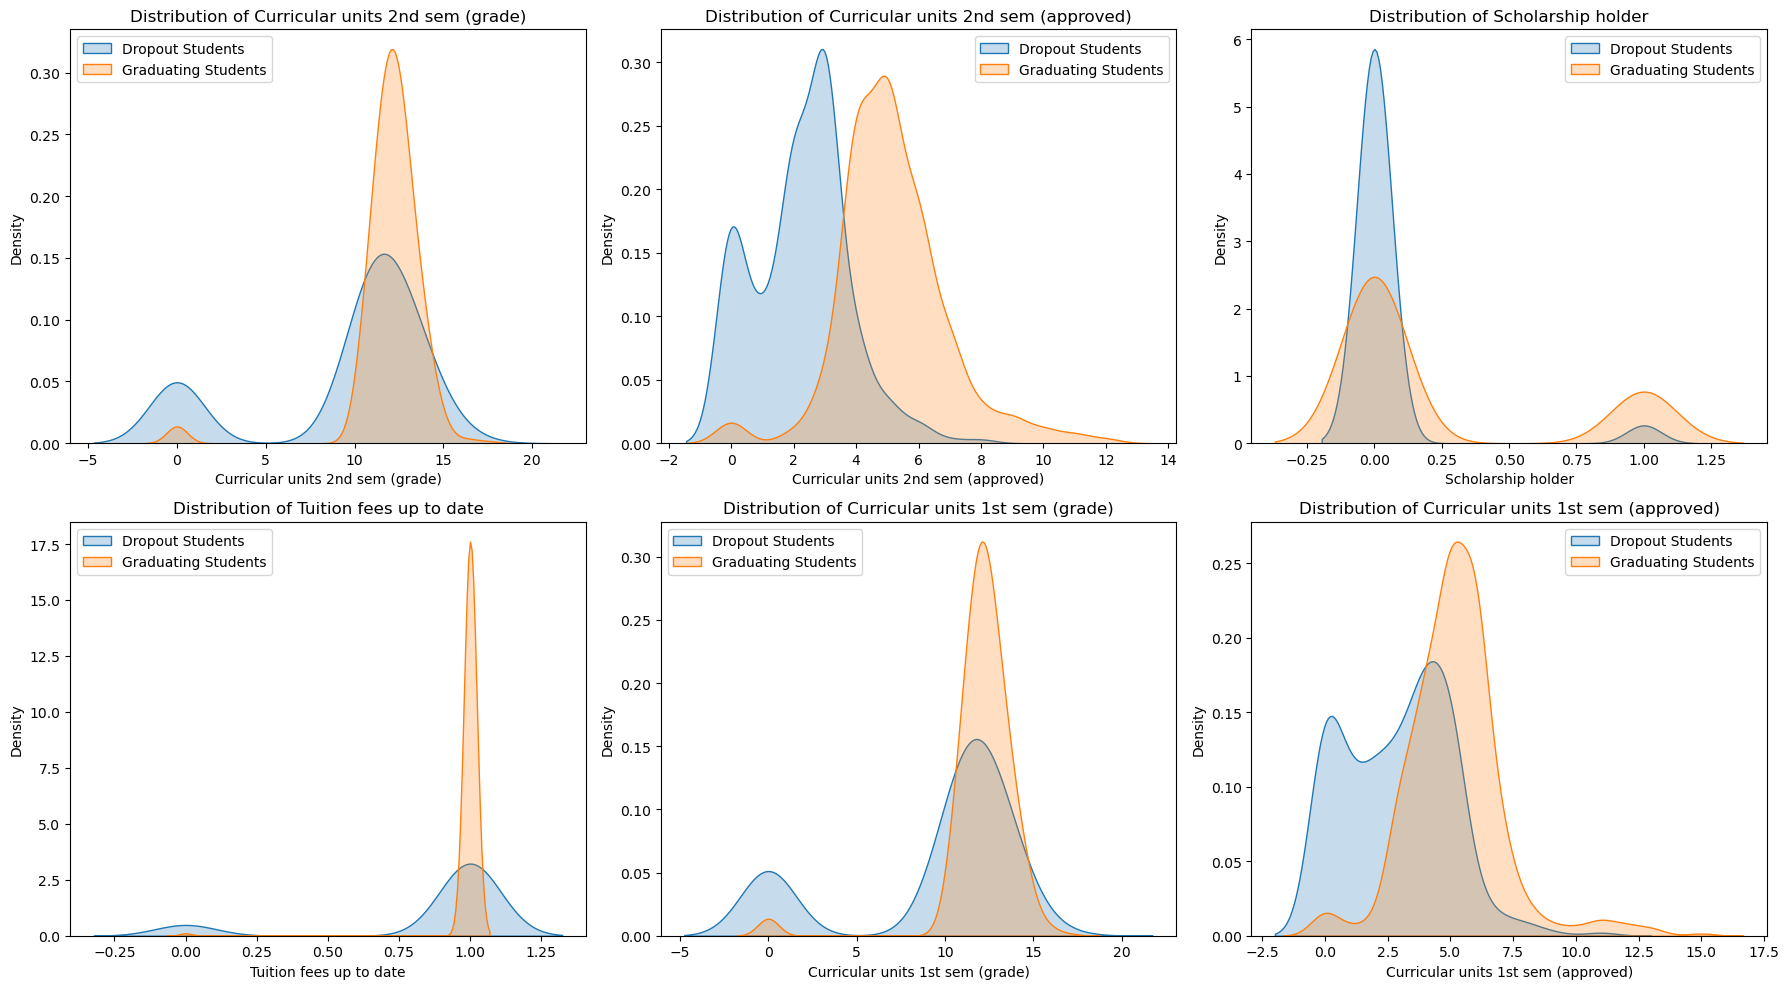

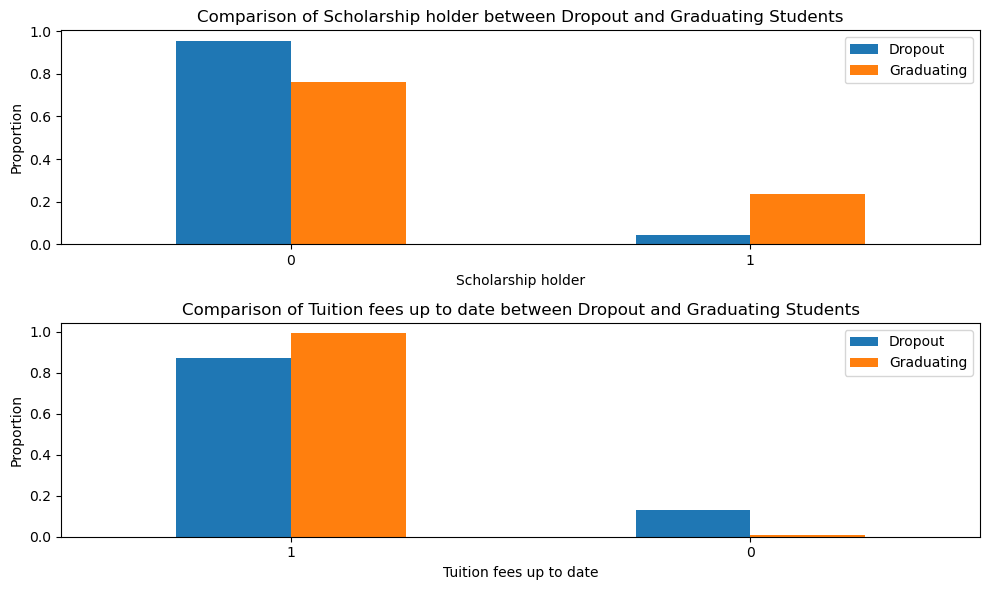

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine both DataFrames (dropout and graduating)
dropout_students = at_risk_students
graduating_students = prob_graduating

# 1. Comparando distribuições de variáveis contínuas com KDE
features_to_compare = ['Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (approved)',
 'Scholarship holder',
 'Tuition fees up to date',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (approved)']

# Define number of rows and columns for subplots (2x3 layout)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Flatten axes array for easier iteration (because we now have 2x3 subplots)
axes = axes.flatten()

for i, feature in enumerate(features_to_compare):
    sns.kdeplot(dropout_students[feature], label='Dropout Students', shade=True, ax=axes[i])
    sns.kdeplot(graduating_students[feature], label='Graduating Students', shade=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].legend()
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# 2. Comparando variáveis categóricas com gráficos de barras
categorical_features = ['Scholarship holder', 'Tuition fees up to date']

# Define number of rows and columns for subplots (1x2 layout)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 6))

# If only one feature, axes is not an array, so we make it an array for consistency
if len(categorical_features) == 1:
    axes = [axes]

for i, feature in enumerate(categorical_features):
    dropout_counts = dropout_students[feature].value_counts(normalize=True)
    graduating_counts = graduating_students[feature].value_counts(normalize=True)
    
    # Criar DataFrame para gráfico de barras
    comparison_df = pd.DataFrame({
        'Dropout': dropout_counts,
        'Graduating': graduating_counts
    }).fillna(0)  # Preencher valores ausentes com 0

    comparison_df.plot(kind='bar', ax=axes[i], figsize=(10, 6))
    axes[i].set_title(f'Comparison of {feature} between Dropout and Graduating Students')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Proportion')
    axes[i].tick_params(axis='x', rotation=0)  # Make sure labels are horizontal

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [43]:
strong_featuresg

['Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (approved)',
 'Scholarship holder',
 'Tuition fees up to date',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (approved)']

/var/folders/mg/trj2dw9n74q5lcbvnrpm0lkw0000gn/T/ipykernel_62266/3627079147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropout_students['Status'] = 'Dropout'
/var/folders/mg/trj2dw9n74q5lcbvnrpm0lkw0000gn/T/ipykernel_62266/3627079147.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graduating_students['Status'] = 'Graduating'


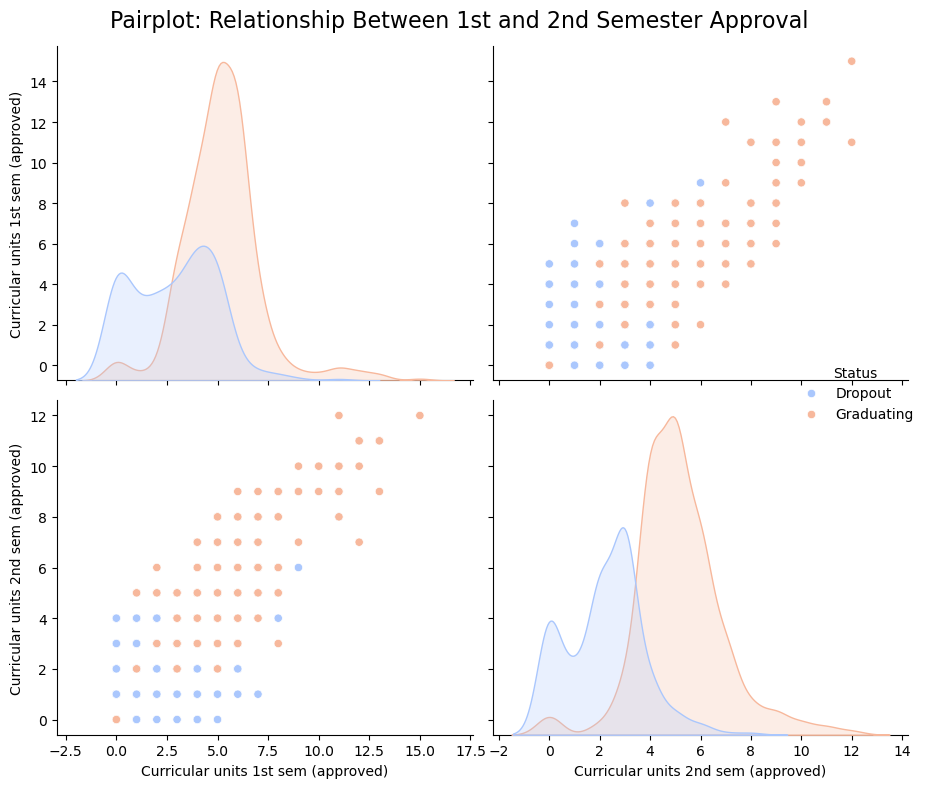

In [55]:
# Criando um DataFrame que une ambos os grupos
dropout_students['Status'] = 'Dropout'
graduating_students['Status'] = 'Graduating'

# Concatenando os DataFrames
combined_df = pd.concat([dropout_students[['Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)', 'Status']],
                         graduating_students[['Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)', 'Status']]])

# Usando pairplot para visualização da relação com figsize aumentado
sns.pairplot(combined_df, hue='Status', vars=['Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)'], palette='coolwarm', height=4)
plt.suptitle('Pairplot: Relationship Between 1st and 2nd Semester Approval', fontsize=16)
plt.tight_layout()
plt.show()

